# Detecting Credit Card Fraud

#### Authors: Maida Raza 

# Problem statement and notes about the dataset

With increasing number of highly advanced techniques employed to scam seniors, job seekers, and everyday human beings out of their money, the risk of credit card fraud has increased drastically. To this end, this project aims to predict (identify) fraudulent credit card transactions using Machine Learning methods.

The dataset used for analysis contains credit card transactions made in September 2013 by European customers. The data represent transactions occurred over 2-days, with 492 marked fraudulent out of 284,807 transactions. Due to confidentiality issues, some features have been transformed. Features not transformed are:

1. Time: seconds elapsed between each transaction and the first transaction in the dataset
2. Amount: transaction amount
3. Class: response variable, 1 in case of fraud, 0 otherwise 

In [1]:
# Importing the libraries. We will import more as we go:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline # ensures that the plots appear directly in the notebook, right below the code that was used to generate them
import seaborn as sns


## Exploratory Data Analysis


In [2]:
# Load the dataset

data = pd.read_csv('/Users/maidaraza/Desktop/Tufts/Course Content/DATA 0201 - Introduction to Python and Machine Learning/Projects/Fraud Detection/creditcard.csv')
data.shape #contains 284807 data observations and 31 columns
data.info() # check for missing observations, ensure data types are correct. it 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

* The dataset contains 284,807 data observations and 31 columns.
* There are no duplicated or missing data observations.

In [3]:
duplicates = data.duplicated()
missing_obs = data.isnull().sum()
datatype = data.dtypes

df = pd.DataFrame({
    'Missing Observations': missing_obs,
    'Duplicated Observations': duplicates,
    'Data Type': datatype
})
df # apparently, the dataset does not have any duplicates!

,Missing Observations,Duplicated Observations,Data Type
0,NaN,False,NaN
1,NaN,False,NaN
2,NaN,False,NaN
3,NaN,False,NaN
4,NaN,False,NaN
...,...,...,...
V5,0.0,NaN,float64
V6,0.0,NaN,float64
V7,0.0,NaN,float64
V8,0.0,NaN,float64


In [4]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Checking Class Distributions

- We are aware that this dataset is skewed towards non-fradulent transactions, with fraudulent transactions representing only 0.173% of the dataset. We will now understand our dataset more deeply through graphics and other analysis.

In [5]:
response_variable = data['Class']

class_dist = response_variable.value_counts()
print(class_dist)

Class
0    284315
1       492
Name: count, dtype: int64


In [6]:
non_fraud_share = round((float((class_dist[0])/(data['Class'].count())) *100), 3)
fraud_share = round(((float(class_dist[1]/data['Class'].count())) *100), 3)

print(f'Share of Fraudulent Transactions: {fraud_share}')
print(f'Share of Non-Fraudulent Transactions: {non_fraud_share}')

Share of Fraudulent Transactions: 0.173
Share of Non-Fraudulent Transactions: 99.827


Fraudulent and Non-Fraudulent Transaction Count, respectively, along with Class labels: ([284315, 492], [0, 1])


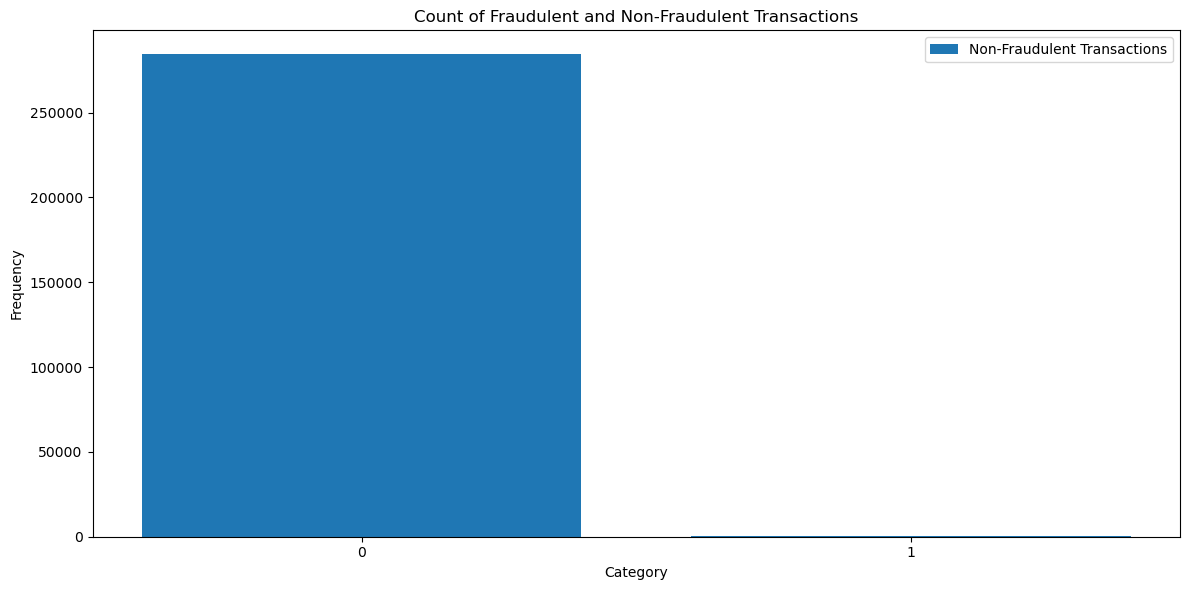

In [7]:
# Creating a bar plot to visualize data distribution
import matplotlib.pyplot as plt

counts_0 = int(class_dist[0])
counts_1 = int(class_dist[1])
unique = response_variable.unique()
x_ticks = unique.tolist()
y_ticks = [counts_0, counts_1]
print(f'Fraudulent and Non-Fraudulent Transaction Count, respectively, along with Class labels: {y_ticks, x_ticks}')

plt.figure(figsize=(12,6))

plt.bar(x_ticks, y_ticks, label ='Non-Fraudulent Transactions')
plt.xticks(x_ticks)
plt.title('Count of Fraudulent and Non-Fraudulent Transactions')
plt.ylabel('Frequency')
plt.xlabel('Category')
plt.legend()
plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Percentage of Fraudulent and Non-Fraudulent Transactions')

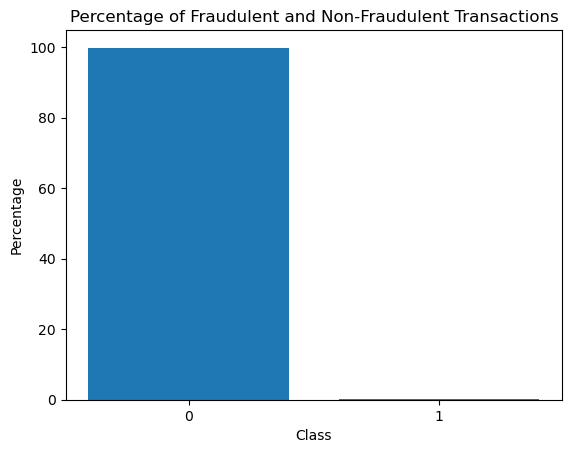

In [8]:
# Creating a bar graph with percentage of fraudulent versus non-fraudulent transactions:
percentage = [non_fraud_share,fraud_share]
plt.bar(x_ticks, percentage, label = 'Non-Fraudulent Transactions Percentage')
plt.xticks(x_ticks)
plt.ylabel('Percentage')
plt.xlabel('Class')
plt.title('Percentage of Fraudulent and Non-Fraudulent Transactions')



### Time Distribution of Classes

Fraudulent transactions mostly occur at odd-hours during the day. We will plot time distribution of classes to understand whether time can be used to identify fraudulent transactions.

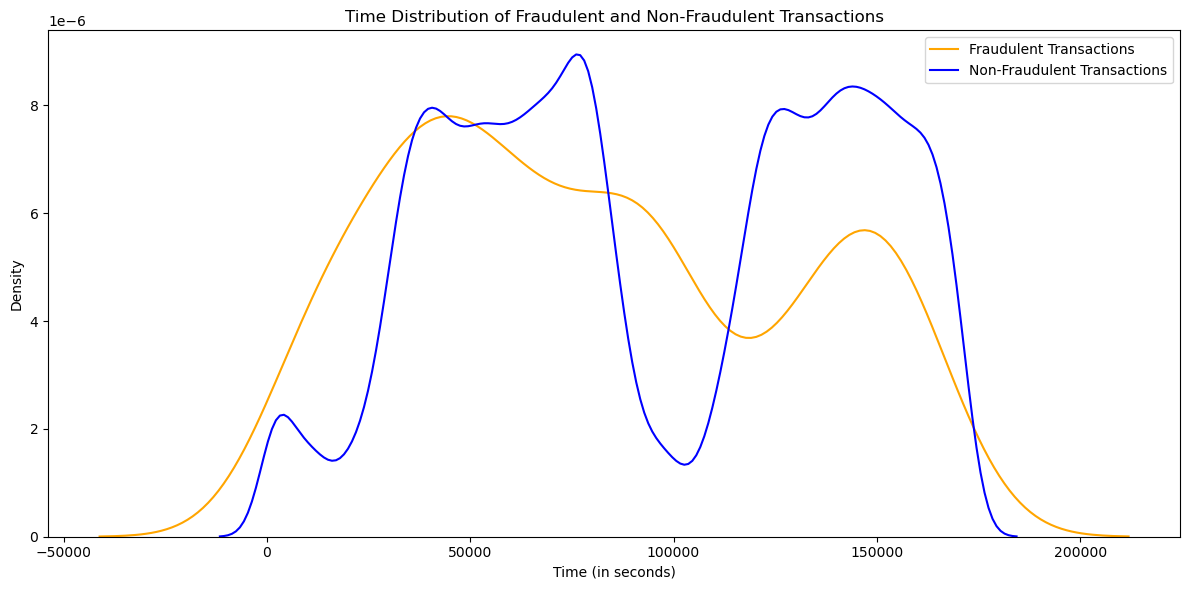

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

data
data_fraud = data[data['Class'] == 1]
data_nonfraud = data[data['Class'] == 0]

# We are trying to see here if there is a trend between the first fraudulent transaction and consecutive ones. We can have a few possibilities:
# Frauds cluster around together.
# The graph below is bimodal - meaning it has two peaks. 

plt.figure(figsize=(12,6))
sns.kdeplot(data_fraud['Time'], color = 'orange', label = 'Fraudulent Transactions')
sns.kdeplot(data_nonfraud['Time'], color = 'blue', label = 'Non-Fraudulent Transactions')
plt.xlabel('Time (in seconds)')
plt.title('Time Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.legend()
plt.tight_layout()
plt.show()

### Discussion: Time Distribution of Fraudulent/Non-Fraudulent Transactions

* Time feature does not inform our analysis significantly:
    * Fraudulent Transactions are spread widely. We do not see them occurring in bursts over certain time intervals. We do observe, though, that fraudulent and non-fraudulent transactions occur within the same time intervals.
    * Mostly, fraudulent transaction occur at unusual times. We do not see that here - fraudulent transactions are not occurring late into the night or very early in the morning. They are taking place during the day.
    * Time does not appear to be a variable of interest, hence I am dropping it

In [10]:
data.drop('Time', axis = 1, inplace=True) # inplace means modify the original dataset directly
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [11]:
#data['Days'] = data['Time'] / (60*60*24)
data_fraud = data[data['Class'] == 1]
data_nonfraud = data[data['Class'] == 0]
data_fraud

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


### Amount Distribution of Fraudulent and Non-Fraudulent Transactions

Usually, fraudulent transactions have very high amounts associated to them. Here, we want to see if an amount pattern can be associated with the fraudulent transactions. This could help us flag potentially fraudulent transactions


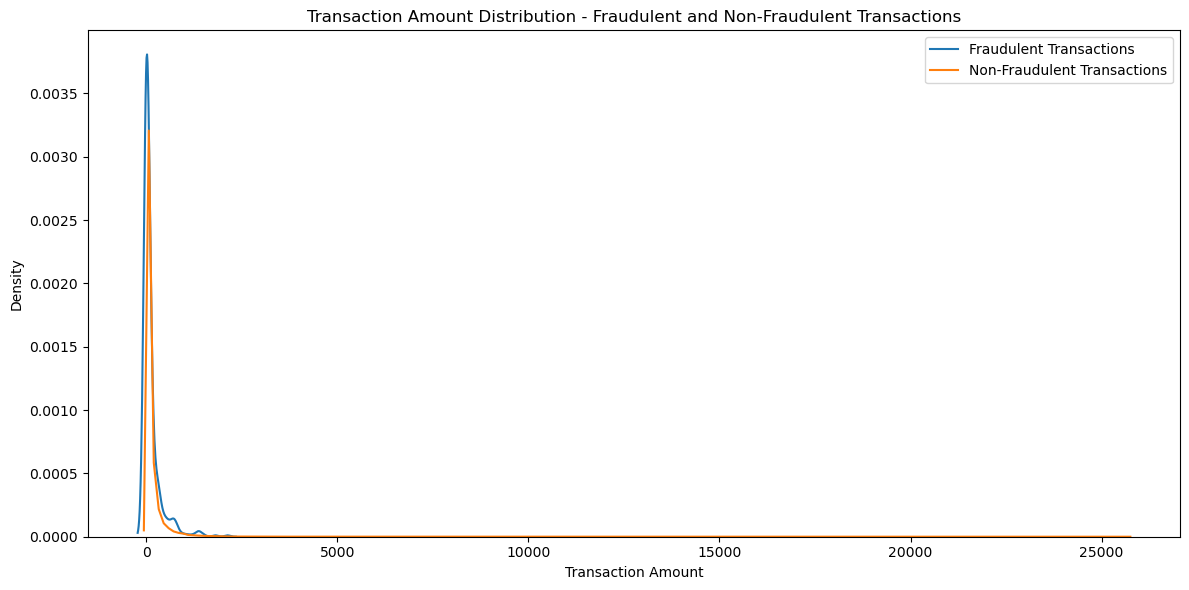

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [12]:
plt.figure(figsize=(12,6))
sns.kdeplot(data_fraud['Amount'], label = 'Fraudulent Transactions')
sns.kdeplot(data_nonfraud['Amount'], label = 'Non-Fraudulent Transactions')
plt.title('Transaction Amount Distribution - Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')

plt.legend()
plt.tight_layout()
plt.show()
data_fraud

### Discussion: Amount Distribution of Fraudulent - Non-Fraudulent Transactions

The graph above demonstrates that both fraudulent and non-fraudulent transactions are clustered around small transaction amounts, i.e., 0-1000. However, we do notice that non-fraudulent transactions spread throughout low to high range of transaction amounts. This implies that Amount feature can help us deduce fraudulent transactions, ONLY to an extent.

## Test-Train Split

To run ML models, we need to divide our data into test and train sets.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Dividing the data into predictors and response variables:

predictors = data.drop(['Class'], axis = 1)
response = data['Class']

# Splitting the data into test and train. I will do a 80-20 split

x_train, x_test, y_train, y_test = train_test_split(predictors, response, train_size = 0.8, test_size=0.2, random_state=100)

### Feature Scaling

As shown below, Amount feature may be assigned a higher weight because it contains numerical values much higher than the remaining features. Hence, it is important to scale  the Amount feature, so our models are not trained on a biased dataset.

In [15]:
# First I would like to see the range for all columns in our data

cols = x_train.columns
cols

for i in cols:
    col_data = x_train[i]
    y = [i, int(col_data.max()), int(col_data.min())]
    print(y)

['V1', 2, -56]
['V2', 22, -72]
['V3', 9, -48]
['V4', 16, -5]
['V5', 34, -113]
['V6', 73, -26]
['V7', 120, -43]
['V8', 19, -73]
['V9', 15, -13]
['V10', 23, -24]
['V11', 11, -4]
['V12', 7, -18]
['V13', 7, -5]
['V14', 10, -18]
['V15', 8, -4]
['V16', 17, -13]
['V17', 9, -25]
['V18', 5, -9]
['V19', 5, -7]
['V20', 39, -54]
['V21', 27, -34]
['V22', 10, -10]
['V23', 22, -44]
['V24', 4, -2]
['V25', 7, -10]
['V26', 3, -2]
['V27', 31, -22]
['V28', 33, -15]
['Amount', 25691, 0]


We need to scale the Amount feature:
* To make it comparable to other variables
* It has higher values than the other variables and may become more important in the model than we need it to be
* Note that I am not fitting the scaler on test set, rather just transforming it

In [16]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train['Amount'] = scale.fit_transform(x_train[['Amount']])
x_test['Amount'] = scale.fit_transform(x_test[['Amount']])
x_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212912,-0.711190,0.439833,0.963645,-1.558006,-0.849632,0.856514,-2.359232,-4.103076,-1.221692,-0.180773,...,0.467513,0.526395,0.555138,-0.715453,-0.339993,1.481497,0.221045,0.134007,0.163621,-0.152428
65615,-2.720797,-2.019693,0.555552,-1.214493,1.091755,-1.048706,-0.732389,0.670327,-1.697393,0.096623,...,-0.532981,-0.510275,-1.524682,0.777497,-0.343277,-0.660123,0.474666,-0.176144,-0.027094,-0.213504
253799,-1.825901,-0.539605,-0.263009,0.516277,-0.432071,0.097944,3.833402,-0.428094,-1.583814,-1.073811,...,1.260578,0.584132,0.544474,0.789313,0.017179,1.626030,-0.308673,-0.237096,0.072098,2.161475
210755,-0.360815,0.942995,0.256998,0.385238,0.606772,-0.806142,0.943830,-0.286445,0.049832,-0.082140,...,-0.389773,0.272937,0.861662,-0.125325,-0.021665,0.011629,-0.565085,-0.283593,0.017381,-0.340485


### Understanding Data Skewness

/var/folders/y_/0vg5mwbj3qv394qthfv5h84c0000gn/T/ipykernel_5842/3532775814.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[i])
/var/folders/y_/0vg5mwbj3qv394qthfv5h84c0000gn/T/ipykernel_5842/3532775814.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[i])
/var/folders/y_/

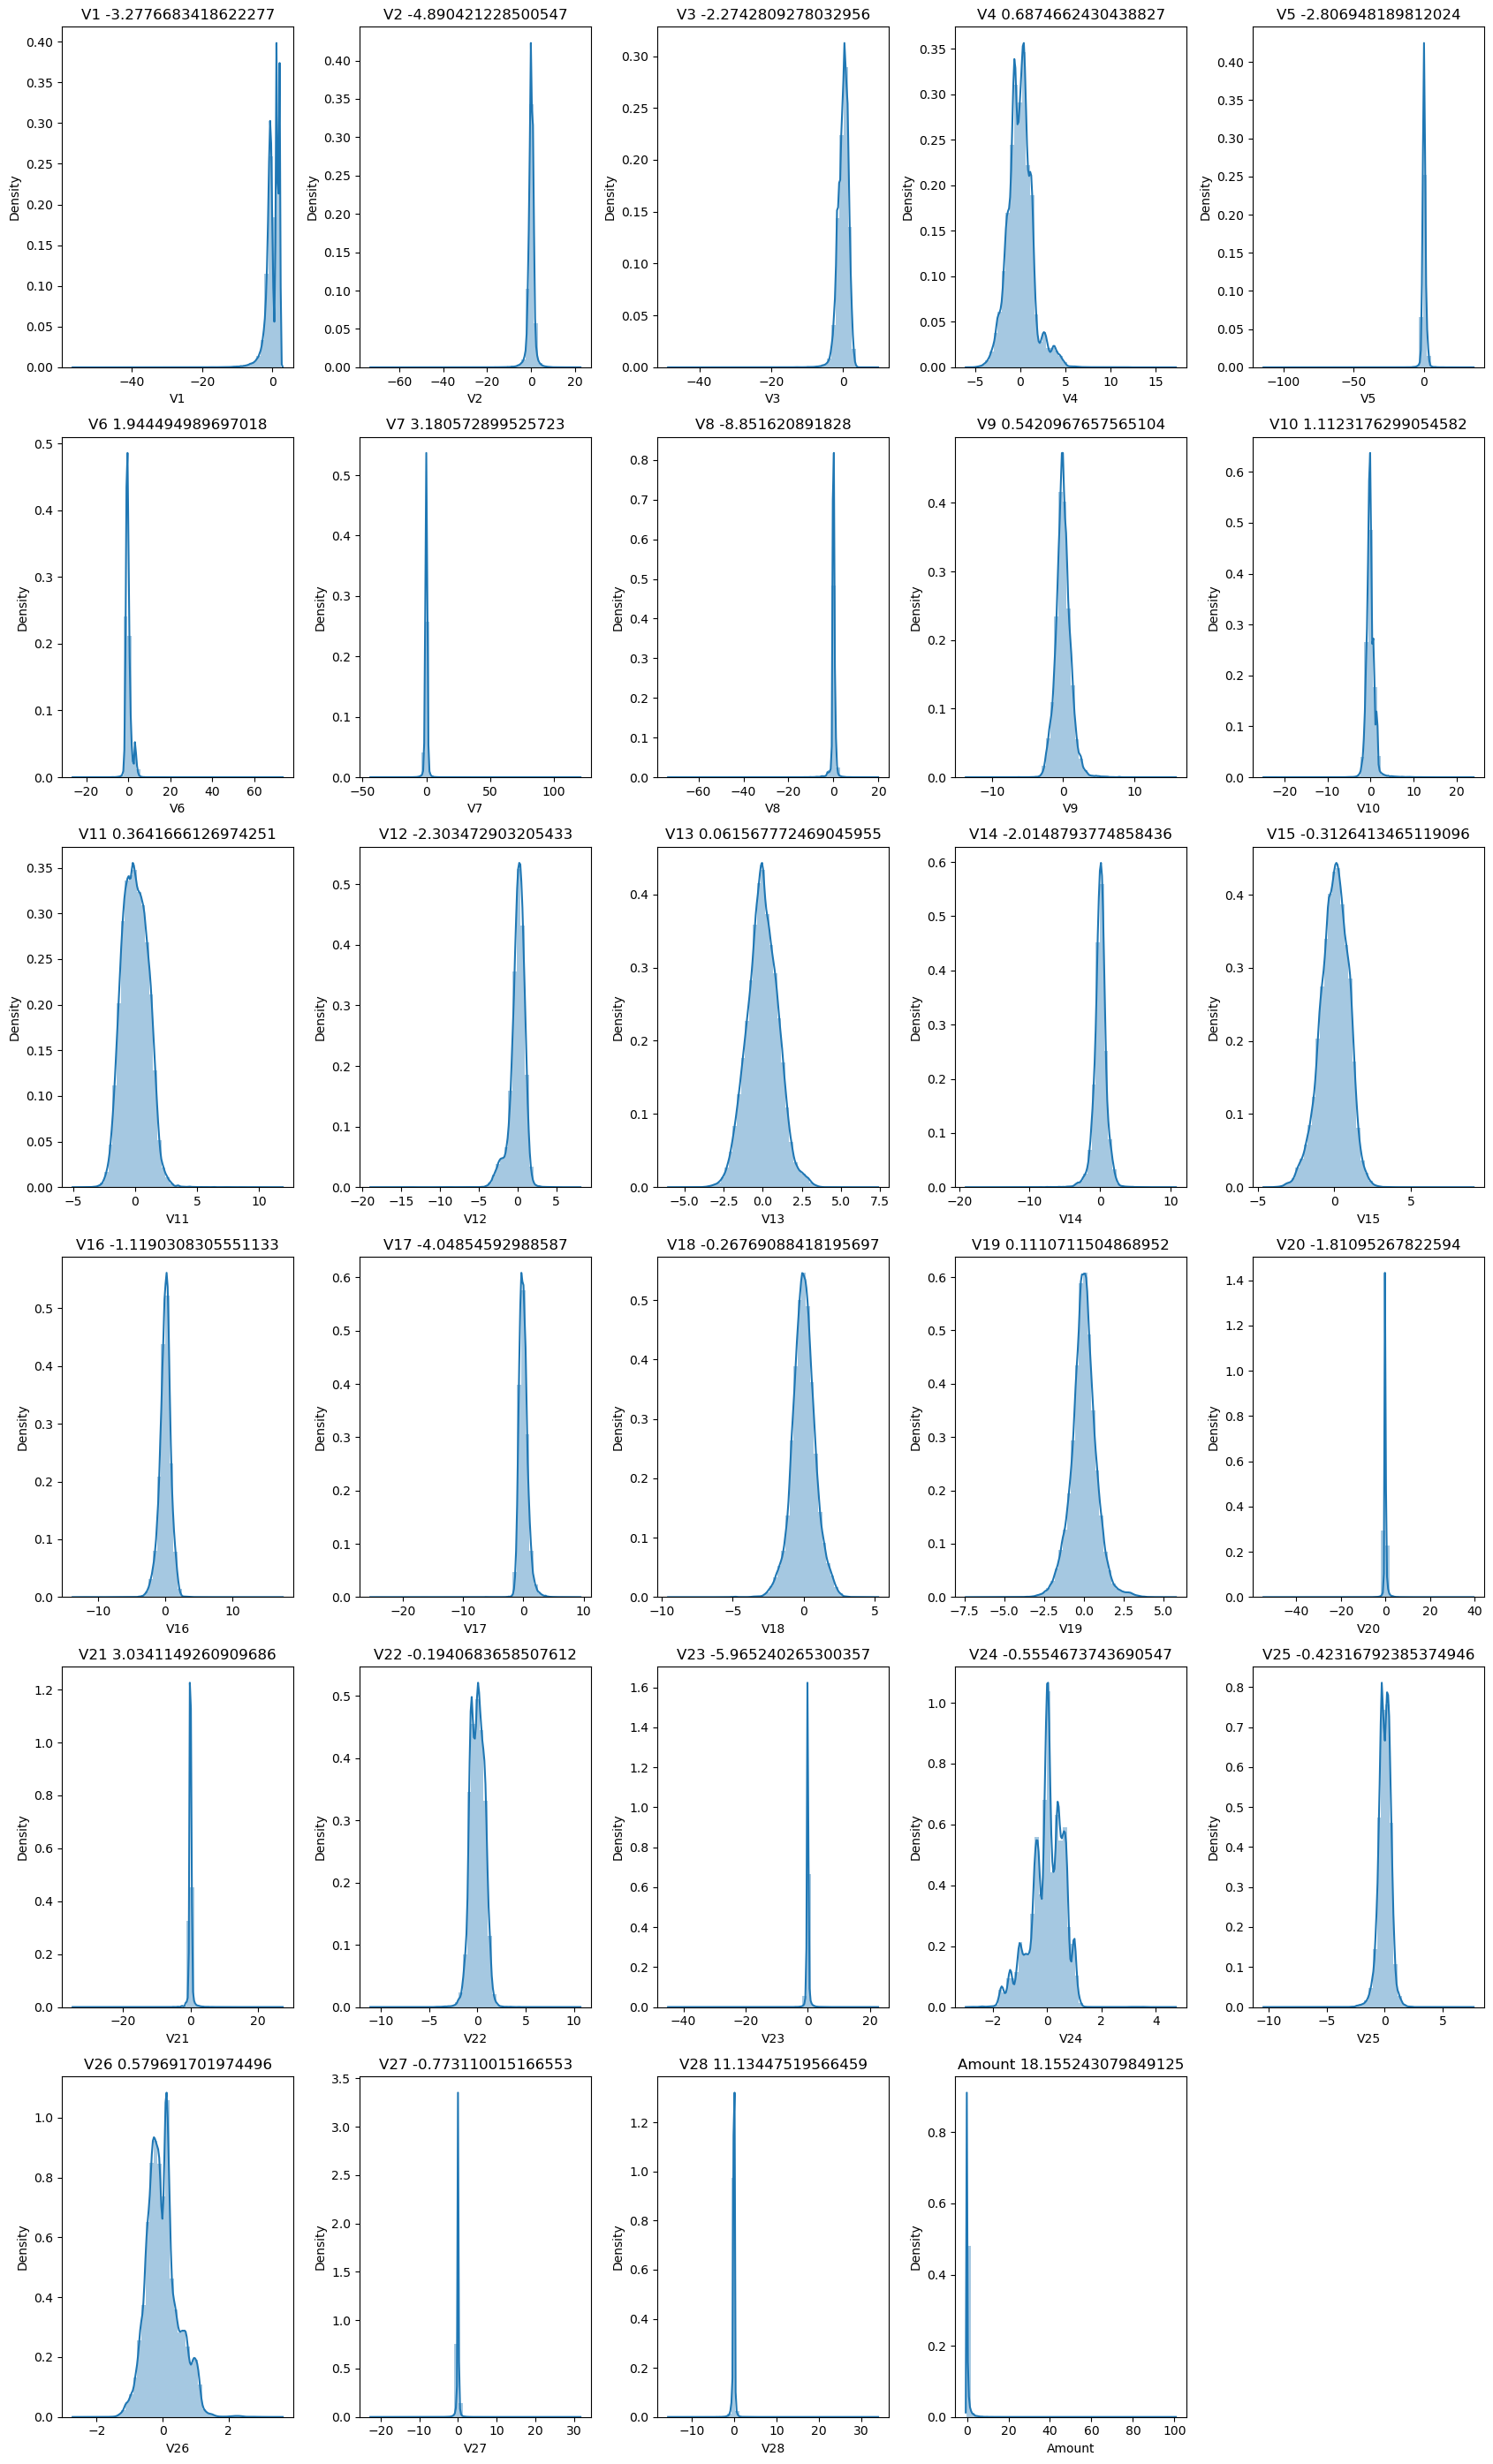

In [17]:
cols = x_train.columns
total_cols = len(cols)

# Creating one large figure to put all of the graphs in one grid
plt.figure(figsize=(17,28))
k=0
for i in cols:
    k=k+1
    plt.subplot(6,5,k)
    sns.distplot(x_train[i])
    plt.title(i+' '+str(x_train[i].skew()))
    plt.tight_layout()
plt.show()

In [18]:
print(cols)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


* As expected and previously noted, the data is heavily skewed, with some features skewed to the right and some to the left. This skewness can cause problems when training a model, as it may lead to biased learning. Additionally, if the test data has different distribution, the model's performance may degrade. Hence, it is important to address skewness for accurate predictions and a robust model. 


### Mitigating the Skewness

We will use PowerTransformer from Sci-Kit Learn. More specifically, we will use Yeo-Johnson method because our data has both positive and negative values. Yeo-Johnson method is used to reduce skewness and make the data more normally distributed - it works on both positive and negative values

/var/folders/y_/0vg5mwbj3qv394qthfv5h84c0000gn/T/ipykernel_5842/1104215849.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[i])
/var/folders/y_/0vg5mwbj3qv394qthfv5h84c0000gn/T/ipykernel_5842/1104215849.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[i])
/var/folders/y_/

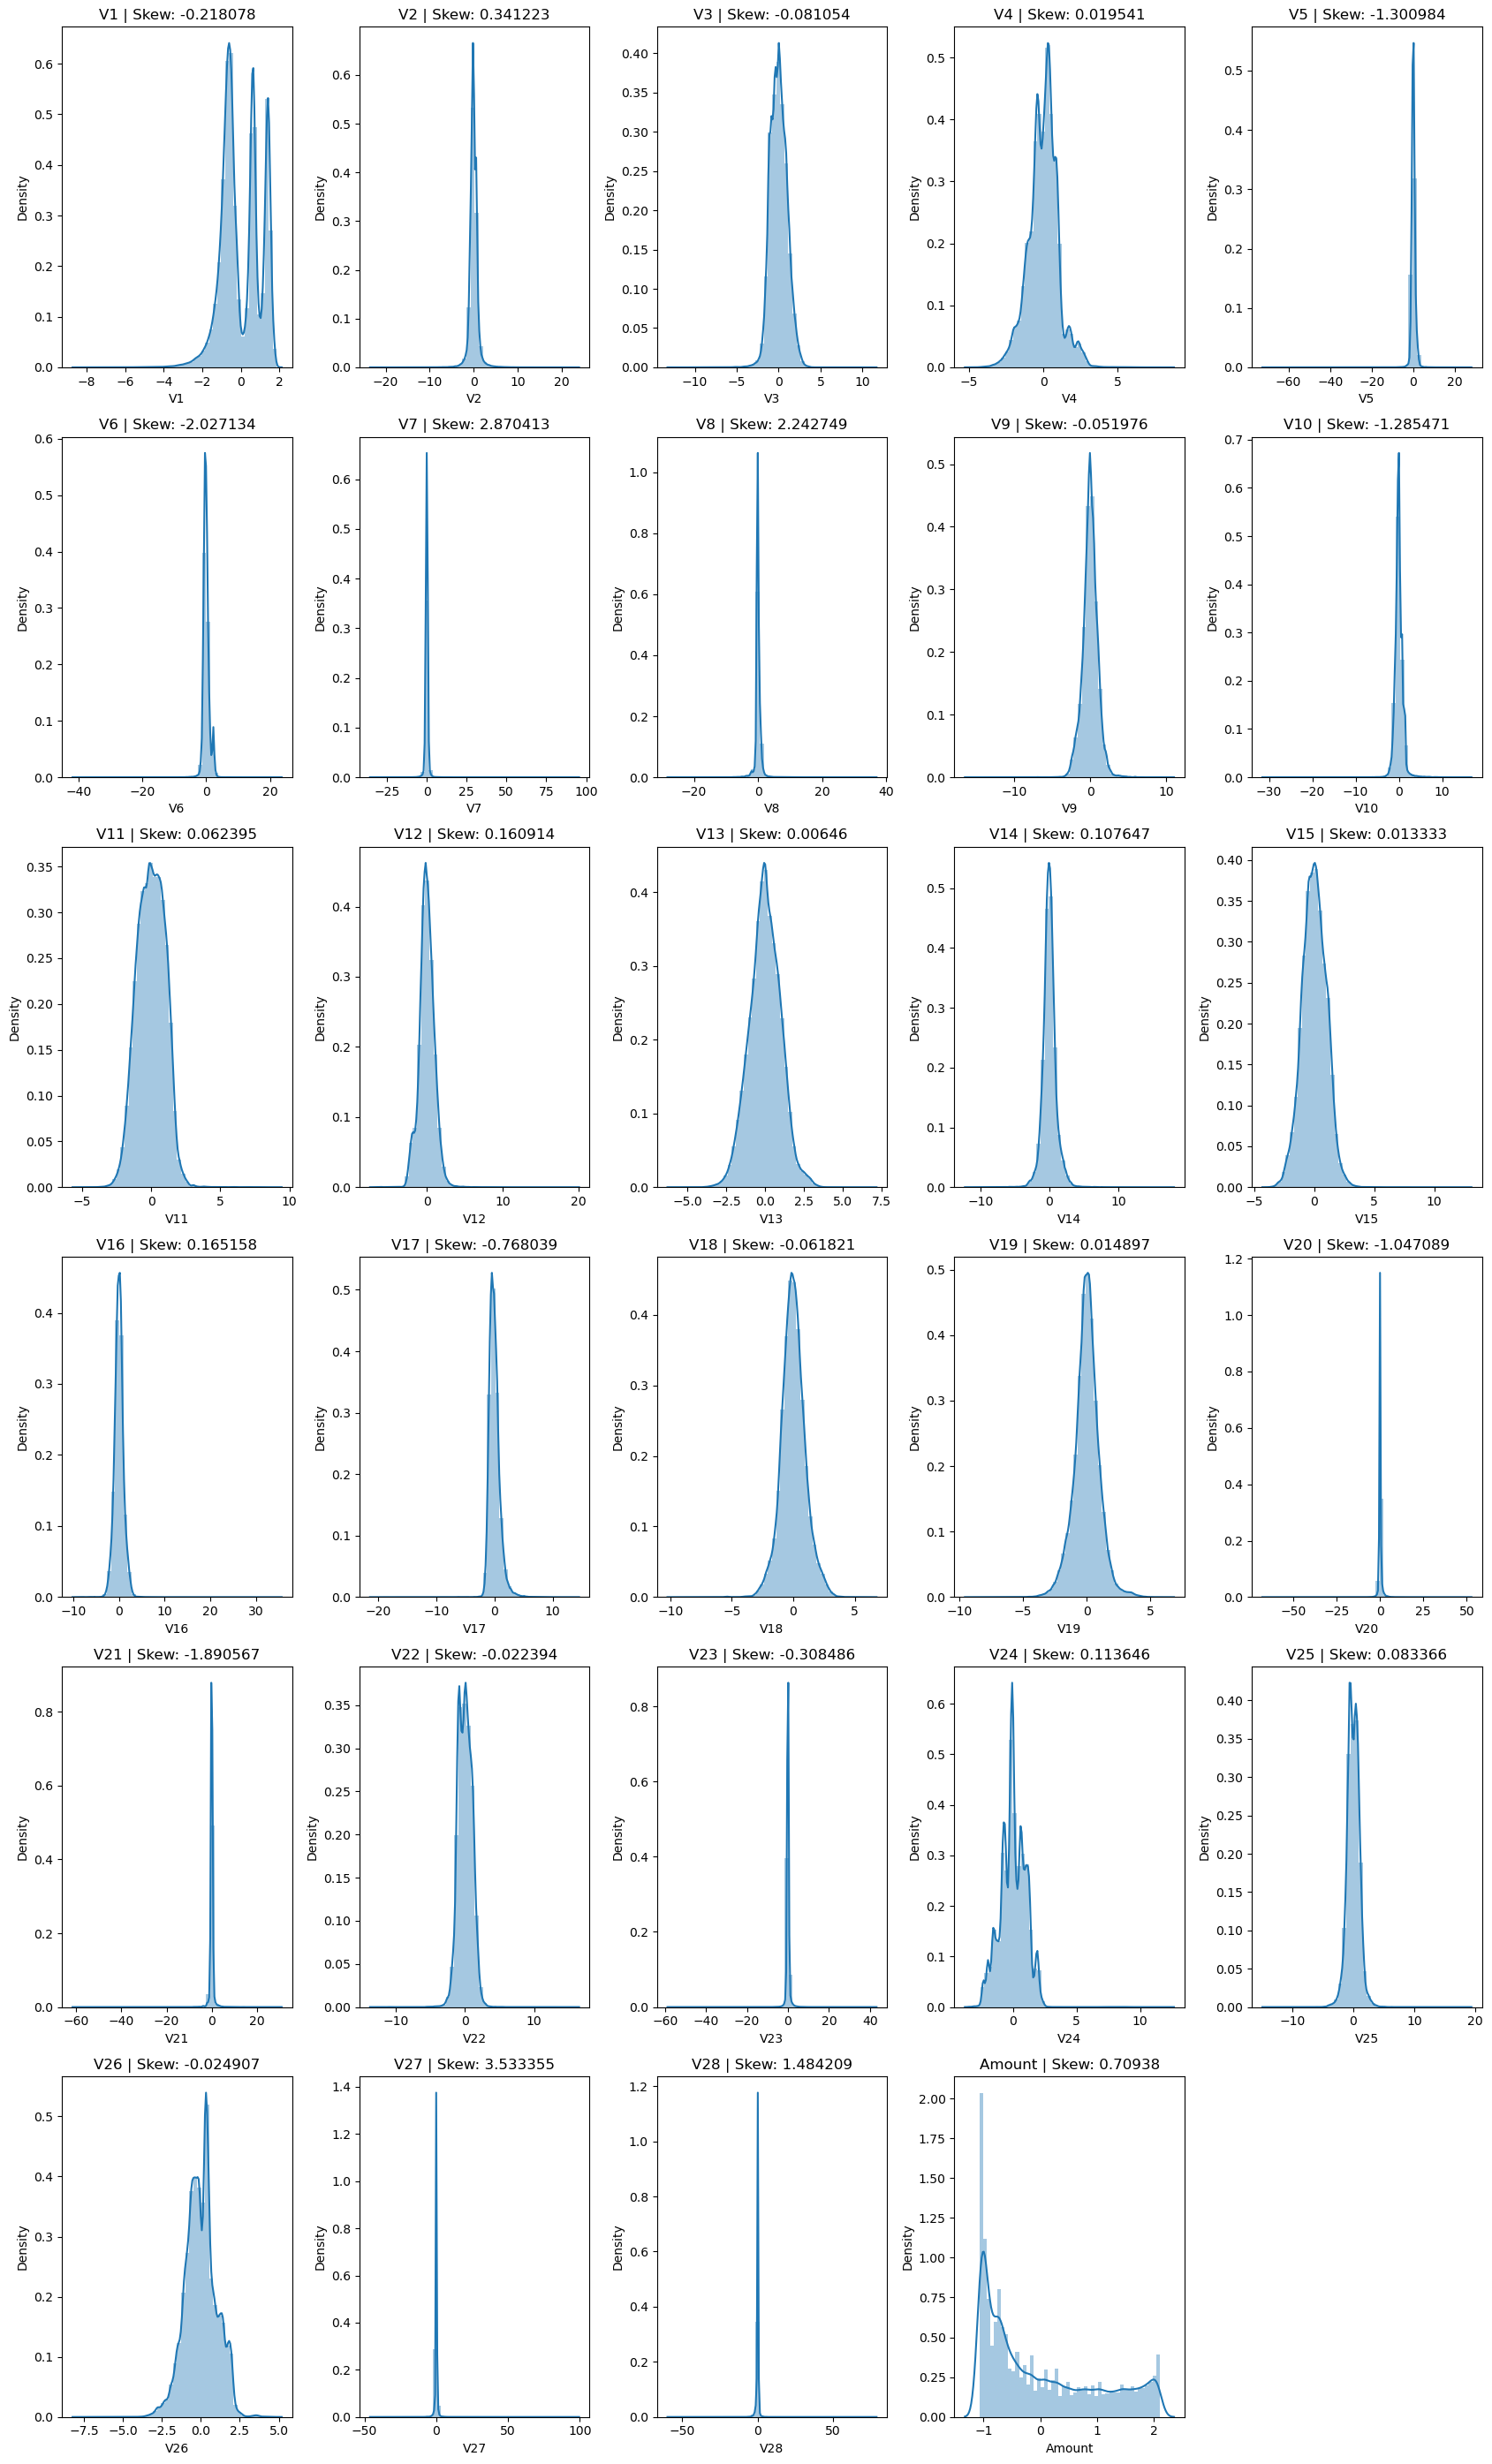

In [19]:
from sklearn.preprocessing import PowerTransformer

# below, copy means create a copy of the data or transform it in the place
# standardize mean scale the ouput to mean = 0 and std = 1

pt = PowerTransformer(method ='yeo-johnson', standardize=True, copy=False)

# Notice that we fit and transform train and only transform test dataset

x_train[cols] = pt.fit_transform(x_train) # Doing this because the data stays in the original DataFrame type
x_test[cols] = pt.transform(x_test)

# Creating plots

plt.figure(figsize=(17,28))
k= 0
for i in cols:
    k=k+1
    plt.subplot(6,5,k)
    sns.distplot(x_train[i])
    plt.title(f'{i} | Skew: {round(x_train[i].skew(),6)}')
plt.tight_layout()
plt.show()

In [20]:
x_train
x_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,0.659542,-0.233654,-0.561392,0.370204,1.315390,2.549487,-0.719290,1.063281,0.710228,-0.097852,...,-0.077251,-0.221050,-0.412899,-0.220148,1.951477,1.709096,-0.514158,0.138782,0.067590,-1.259911
154704,1.407380,-0.141301,-1.746728,-0.024158,1.977052,2.170887,-0.523047,0.729273,1.697680,-0.967276,...,-0.192674,-0.240958,-0.141136,0.129797,0.968209,0.160661,1.254388,-0.132660,-0.120926,-1.055342
67247,0.097973,-0.938840,0.531205,0.347000,-1.035043,0.388178,-0.400021,0.232059,0.957934,-0.377877,...,0.562484,0.056443,-0.542848,-0.217122,0.411313,-0.298681,1.725945,-0.217809,0.173409,1.900503
251657,1.521872,-0.159419,-1.049837,0.196778,0.249270,-0.347533,0.094357,-0.283326,0.654474,0.115477,...,-0.295092,-0.488160,-1.237974,0.351752,-1.633606,-0.395924,0.627852,-0.189052,-0.212339,-1.302270
201903,0.115287,1.081172,-1.466710,3.070695,1.596924,-0.312184,0.850740,-0.318420,-1.925026,0.886989,...,0.319153,-0.031413,0.360358,0.611544,0.497076,-0.666162,0.958511,0.411501,0.027014,-0.248908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232852,1.110810,-0.498689,-0.549370,0.322168,-0.348241,-0.049930,-0.200727,-0.103103,0.785792,-0.028709,...,0.151151,-0.136681,-0.657363,0.321562,-0.767419,-0.849699,-1.540489,0.005467,-0.052337,1.424625
227811,-0.707852,0.493312,0.877794,-0.341326,-0.398506,-0.350058,-0.025155,0.473163,0.332474,-0.793024,...,-0.108210,0.367536,1.127167,-0.386340,0.062004,-0.179243,1.275242,0.523366,0.390610,-0.886508
30905,0.705284,-0.767160,-0.170847,-1.014039,-0.832510,-0.411934,-0.448084,-0.186604,-2.432826,1.393130,...,-0.279025,-0.498646,-1.263236,0.189885,0.198582,0.291938,-0.971761,-0.016398,0.068044,1.084213
104456,-0.694396,0.534679,0.721237,0.019705,0.289659,-0.375393,0.439140,-0.071977,-0.429688,-0.063219,...,0.069329,-0.299095,-0.820883,0.296613,-0.178009,-0.219189,0.217548,-0.033076,0.321313,-1.289511


## Logistic Regression (Imbalanced Data)

In [21]:
# Importing Sci-Kit Learn Logistic Regression module and other metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [22]:
# In this task, we will perform hyperparameter tuning using GridSearchCv and K-Fold Cross Validation to optimize ROC-AUC. ROC reflect the model's ability to distinguish between classes
# C-Hyperparameter is the inverse of regularization in Logistic Regression. Whatever C value we find, we will use that to run our model later
# GridSearchCV is a tool in sci-kit learn that is used to find the best combination of hyperparameters for a model by testing all possible combinations.

folds = KFold(n_splits = 5, shuffle = True, random_state=4)

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Verbose shows the progress for each hyperparameter. 1 is minimal information, 2 is more than that, 3 is detailed 

model_CV = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid = params,
    scoring = 'roc_auc',
    cv = folds,
    verbose =1,
    return_train_score = True
)

# Fitting the model
model_CV.fit(x_train, y_train)



Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

* According to the GridSearchCV, the best C = 0.01. I am printing the results of the GridSearchCV below, to observe the mean test and train scores. Note that we achieve the best train-test score at C=1. After that, the model starts overfitting

In [23]:
import pandas as pd
cv_results = model_CV.cv_results_
pd = pd.DataFrame(cv_results)
pd

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.213442,0.030269,0.015551,0.004244,0.01,{'C': 0.01},0.986595,0.987068,0.969244,0.981472,...,0.983674,0.008241,1,0.983877,0.984106,0.988321,0.985739,0.982709,0.984950,0.001943
1,0.213774,0.030754,0.012894,0.000484,0.10,{'C': 0.1},0.985593,0.987368,0.966190,0.980005,...,0.982663,0.009395,2,0.982962,0.983607,0.988169,0.984679,0.981988,0.984281,0.002132
2,0.236340,0.068108,0.015049,0.003078,1.00,{'C': 1},0.985601,0.987346,0.960695,0.979551,...,0.981484,0.011399,3,0.982770,0.983390,0.987509,0.984222,0.981921,0.983962,0.001927
3,0.224890,0.060337,0.013136,0.001428,10.00,{'C': 10},0.985580,0.987338,0.961110,0.979525,...,0.981068,0.010726,4,0.982758,0.983365,0.987466,0.984354,0.980767,0.983742,0.002200
4,0.255736,0.074675,0.015307,0.003131,100.00,{'C': 100},0.985578,0.987338,0.959647,0.979517,...,0.980772,0.011272,5,0.982757,0.983362,0.987354,0.984366,0.980764,0.983721,0.002164
5,0.324139,0.104815,0.029038,0.027360,1000.00,{'C': 1000},0.985578,0.987338,0.959637,0.979519,...,0.980771,0.011275,6,0.982757,0.983362,0.987352,0.984367,0.980764,0.983721,0.002164


In [24]:
y = pd['param_C']
mean_test_score = pd['mean_test_score']
mean_train_score = pd['mean_train_score']



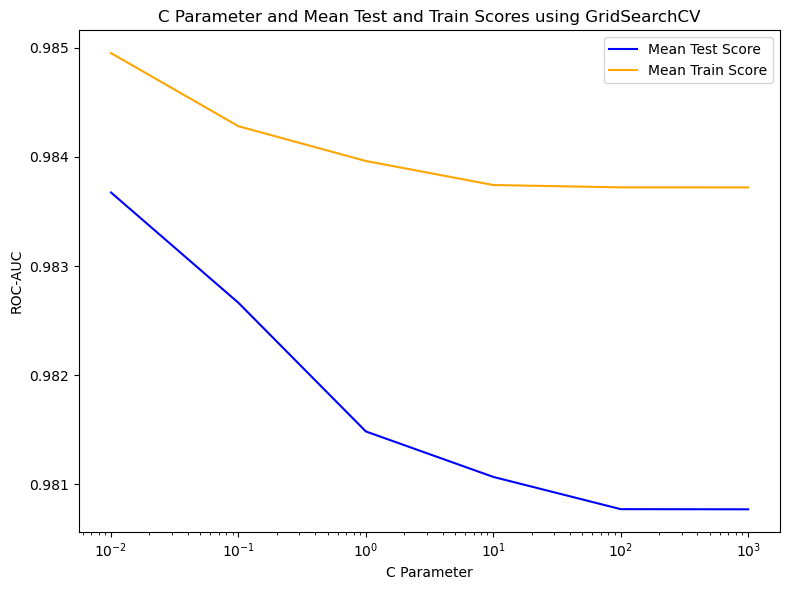

In [25]:
# Plotting the C test and train scores

plt.figure(figsize=(8,6))
plt.plot(y, mean_test_score, label = 'Mean Test Score', color = 'blue')
plt.plot(y, mean_train_score, label = 'Mean Train Score', color = 'orange')
plt.xscale('log')

plt.xlabel('C Parameter')
plt.ylabel('ROC-AUC')
plt.title('C Parameter and Mean Test and Train Scores using GridSearchCV')
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
# I also want to know what is the ROC_AUC score here
best_roc_auc_score = model_CV.best_score_
best_C = model_CV.best_params_['C']

print(f'The highest ROC-AUC score is {best_roc_auc_score} at C = {best_C}')

The highest ROC-AUC score is 0.9836736960858568 at C = 0.01


### Logistic Regression with Optimal C

#### Prediction on train set

In [27]:
from sklearn.linear_model import LogisticRegression

model_optimal_c = LogisticRegression(C=0.01)
model_optimal_c.fit(x_train, y_train)
y_predict = model_optimal_c.predict(x_train)

# Generate a confusion matrix and accuracy score
conf_mat = confusion_matrix(y_train, y_predict)
acc_score = accuracy_score(y_train, y_predict)

# F-Score = (Precision * Recall)/(Precision + Recall)
# Precision tells us how many of the predicted positives were actually positive
# Recall tells us how many of the actual positives did we identify

f_score = f1_score(y_train, y_predict)

TP = conf_mat[1,1] # true positive
TN = conf_mat[0,0] # true negative
FP = conf_mat[0,1] # false positive
FN = conf_mat[1,0] # false negative

# Sensitivity shows us that out of all the positives, how many did our model actually catch
# Specificity shows us that out of all the negatives, how many did our model actually catch

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Printing all the scores
print(f'Confusion Matrix: {conf_mat}')
print(f'Accuracy Score: {acc_score}')
print(f'F-1 Score: {f_score}')
print(f'Sensitivity = {sensitivity}')
print(f'Specificity = {specificity}')
report = classification_report(y_train, y_predict)
print(report)

Confusion Matrix: [[227427     22]
 [   138    258]]
Accuracy Score: 0.999297768219623
F-1 Score: 0.7633136094674556
Sensitivity = 0.6515151515151515
Specificity = 0.9999032750198946
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.65      0.76       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



In [28]:
# Generating Classification Report
report = classification_report(y_train, y_predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.65      0.76       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



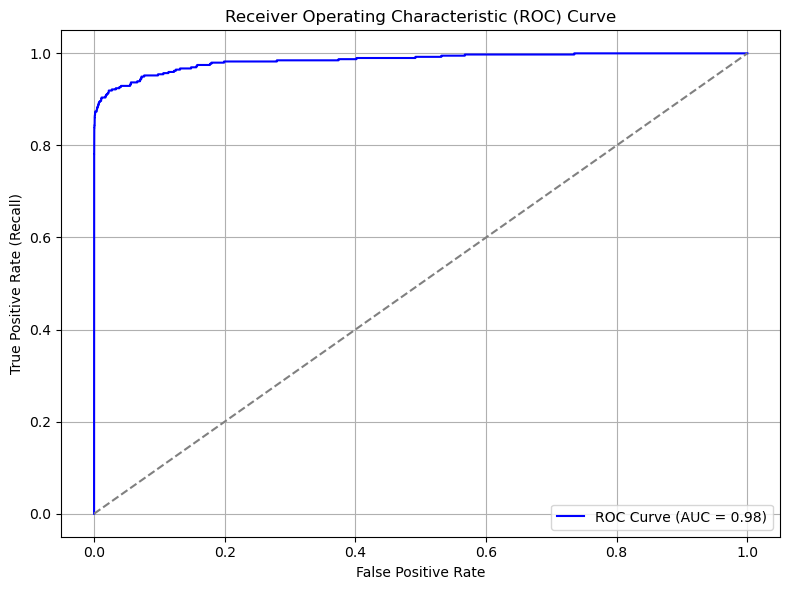

In [29]:
# Generating ROC-AUC
from sklearn.metrics import roc_curve, auc

def draw_roc(actual, probability):
    fpr,tpr,threshold = roc_curve(actual, probability)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random model
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
y_probability = model_optimal_c.predict_proba(x_train)[:,1]
draw_roc(y_train, y_probability)

#### Prediction on the test set

In [30]:
y_test_predict = model_optimal_c.predict(x_test)

# Create a confusion matrix

conf_mat = confusion_matrix(y_test, y_test_predict)
acc_score = accuracy_score(y_test, y_test_predict)

TP = conf_mat[1,1]
FP = conf_mat[0,1]
TN = conf_mat[0,0]
FN = conf_mat[1,0]


In [31]:
print(f'Confusion Matrix: {conf_mat}')
print(f'Accuracy Score: {acc_score}')
print(f'Sensitivity: {TP/(TP+FN)}')
print(f'Specificity: {TN/(TN+FP)}')
print(f'F-Score: {f1_score(y_test, y_test_predict)}')

Confusion Matrix: [[56850    16]
 [   42    54]]
Accuracy Score: 0.9989817773252344
Sensitivity: 0.5625
Specificity: 0.9997186367952731
F-Score: 0.6506024096385542


In [32]:
# Generating the classification report

report = classification_report(y_test, y_test_predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



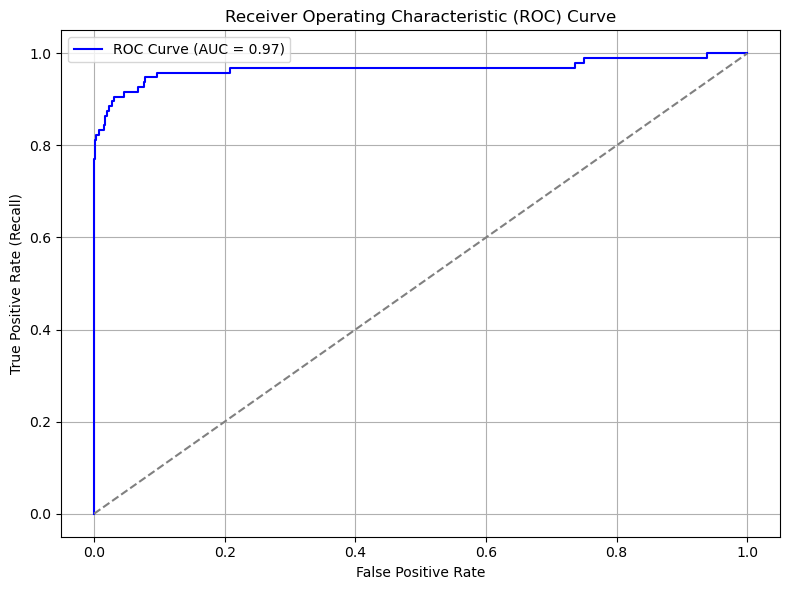

In [33]:
# Make ROC
y_probability = model_optimal_c.predict_proba(x_test)[:, 1]
draw_roc(y_test, y_probability)

# Logistic Regression Result Summary (Imbalanced Data)

* Train Set:
    * Accuracy Score = 0.99
    * Sensitivity (how many positives from all were caught) = 0.65
    * Specificity (how many negatives from all were caught) = 0.99
    * ROC Score = 0.99

* Test Set:
    * Accuracy Score = 0.99
    * Sensitivity = 0.56
    * Specificity = 0.999
    * ROC Score = 0.97

The model seems to be performing poorly on the test data, capturing only 56% of the fraudulent transactions.

# Decision Tree (Imbalanced Data) 

Now, I will prepare Decision Tree model and see how that compares with the Logistic Regression model.

First, I will find a combination of Decision Tree parameters that optimize our model

* Max Depth Range: 
    * 1-3: Shallow tree, high bias, may underfit
    * 3-10: Good range, balances bias and variance well
    * 10-20: Works for large datasets, risks overfitting
    * Less than 20: Deep tree, often overfits unless very large/complex dataset

* Max Features:
    * Depends upon your dataset
    * SQRT: Minimize the number of features and helps reduce overfitting
    * log2
    * None = use all features for the decision tree
    * int: uses the exact number of features in the tree
    * float: takes fraction

* Max Leaf Nodes:
    * Can be determined using the dataset, so if Gini Impurity is 0 then pure node, only one leaf node needed. 


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np


In [35]:
parameters_grid = {
    'max_depth': range(1,5),
    'max_features': [2,5,10, int, 'sqrt', 'log2'],
    'min_samples_leaf': range(1,5),
    
}
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(
    estimator = dtree,
    param_grid = parameters_grid,
    scoring = 'roc_auc',
    cv=3,
    verbose = 1
)

# Now, we will fit
grid_search.fit(x_train, y_train) # I think we fit over here to tell the computer that use this dataset to generate the optimal hyperparameters


Fitting 3 folds for each of 96 candidates, totalling 288 fits


/opt/miniconda3/envs/ml135_env_sp21/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
48 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/ml135_env_sp21/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/ml135_env_sp21/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/miniconda3/envs/ml135_env_sp21/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_param

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 5),
                         'max_features': [2, 5, 10, <class 'int'>, 'sqrt',
                                          'log2'],
                         'min_samples_leaf': range(1, 5)},
             scoring='roc_auc', verbose=1)

In [36]:
# We will now get the cv_results, which tell us more about the optimal parameters

import numpy as np 
import pandas as pd

cv_results_dtree = grid_search.cv_results_
pd = pd.DataFrame(cv_results_dtree)
pd

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.106764,0.015297,0.013019,0.001182,1,2,1,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.871001,0.799137,0.534071,0.734736,0.144893,69
1,0.094983,0.002281,0.011773,0.000292,1,2,2,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.619318,0.594506,0.549196,0.587673,0.029032,80
2,0.090041,0.002255,0.011555,0.000231,1,2,3,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.526495,0.541667,0.738551,0.602238,0.096587,79
3,0.098401,0.015154,0.011698,0.000279,1,2,4,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.780085,0.590355,0.686635,0.685692,0.077460,73
4,0.176455,0.025709,0.012666,0.001365,1,5,1,"{'max_depth': 1, 'max_features': 5, 'min_sampl...",0.689308,0.579512,0.836871,0.701897,0.105442,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.490528,0.002688,0.012333,0.000237,4,sqrt,4,"{'max_depth': 4, 'max_features': 'sqrt', 'min_...",0.912344,0.882284,0.839816,0.878148,0.029754,11
92,0.396614,0.004483,0.012181,0.000073,4,log2,1,"{'max_depth': 4, 'max_features': 'log2', 'min_...",0.897540,0.851684,0.878450,0.875891,0.018808,13
93,0.386365,0.005477,0.012466,0.000167,4,log2,2,"{'max_depth': 4, 'max_features': 'log2', 'min_...",0.882781,0.891324,0.810173,0.861426,0.036409,24
94,0.394393,0.012379,0.012581,0.000219,4,log2,3,"{'max_depth': 4, 'max_features': 'log2', 'min_...",0.891306,0.821761,0.881110,0.864726,0.030664,20


In [37]:
# Look got best estimator and optimal sensitivity 
print(f'Best ROC-AUC is {grid_search.best_score_}')
print(grid_search.best_estimator_) # tells us which model is the best

Best ROC-AUC is 0.9001445426024576
DecisionTreeClassifier(max_depth=4, max_features=10, min_samples_leaf=4)


In [38]:
# Model with the optimal hyperparameters:
dt_imb_tree = DecisionTreeClassifier(max_depth=4, criterion='gini', max_features=10, min_samples_leaf=4)
dt_imb_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=10, min_samples_leaf=4)

#### Prediction on train set

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

dt_y_train_predict = dt_imb_tree.predict(x_train)

# Creating the confusion matrix
conf_mat = confusion_matrix(y_train, dt_y_train_predict)
acc_score = accuracy_score(y_train, dt_y_train_predict)
y_probability = dt_imb_tree.predict_proba(x_train)[:, 1]


# Define TP, FP, TN, FN
TP = conf_mat[1,1]
FP = conf_mat[0,1]
TN = conf_mat[0,0]
FN = conf_mat[1,0]

# Printing
print(f'Confusion Matrix: {conf_mat}')
print(f'Accuracy Score = {acc_score}')
print(f'Sensitivity = {TP / (TP+FN)}')
print(f'Specificity = {TN / (TN+FP)}')
print(f'F1-Score = {f1_score(y_train, dt_y_train_predict)}')
print(f'ROC Score = {roc_auc_score(y_train, y_probability)}')
print(f'\nClassification Report: \n{classification_report(y_train, dt_y_train_predict)}') #\n indicates to jump to the next line

Confusion Matrix: [[227426     23]
 [   100    296]]
Accuracy Score = 0.9994601593188351
Sensitivity = 0.7474747474747475
Specificity = 0.9998988784298898
F1-Score = 0.827972027972028
ROC Score = 0.9253709822661544

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.93      0.75      0.83       396

    accuracy                           1.00    227845
   macro avg       0.96      0.87      0.91    227845
weighted avg       1.00      1.00      1.00    227845



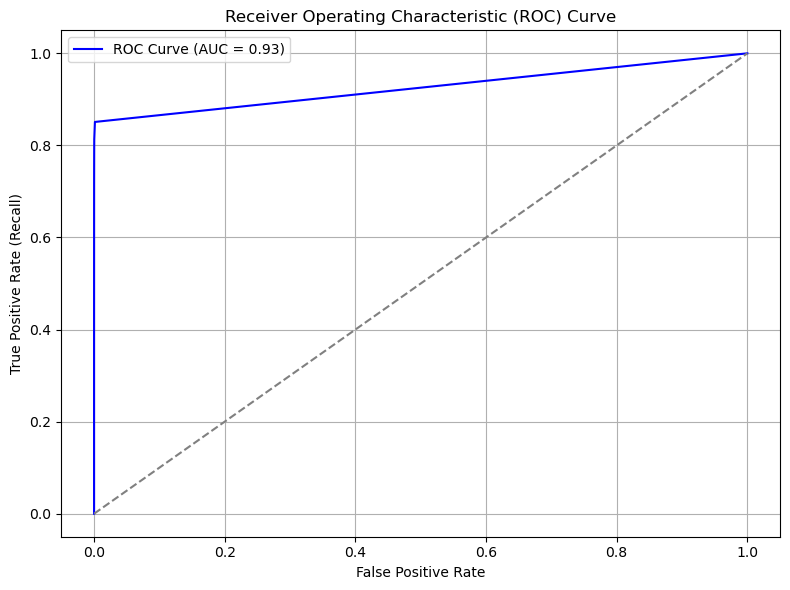

In [40]:
# ROC on Train Data

draw_roc(y_train, y_probability)

#### Prediction on test set



In [41]:
y_test_predict = dt_imb_tree.predict(x_test)
y_probability = dt_imb_tree.predict_proba(x_test)[:, 1]

In [42]:
# Printing the confusion matrix, accuracy score, sensitivity, specificity, classification report
conf_matrix = confusion_matrix(y_test, y_test_predict)
roc_score = roc_auc_score(y_test, y_probability)

# Defining TP, FP, TN, FN
TP = conf_mat[1,1]
FP = conf_mat[0,1]
TN = conf_mat[0,0]
FN = conf_mat[1,0]

print(f'Confusion Matrix: {confusion_matrix(y_test, y_test_predict)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_test_predict)}')
print(f'Sensitivity: {TP/(TP+FN)}')
print(f'Specificity: {TN/(TN+FP)}')
print(f'F1-Score = {f1_score(y_test, y_test_predict)}')
print(f'ROC Score = {roc_score}')
print(f'\n Classification Report: \n{classification_report(y_test, y_test_predict)}')

Confusion Matrix: [[56841    25]
 [   33    63]]
Accuracy Score: 0.9989817773252344
Sensitivity: 0.7474747474747475
Specificity: 0.9998988784298898
F1-Score = 0.6847826086956522
ROC Score = 0.8954442607767968

 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.72      0.66      0.68        96

    accuracy                           1.00     56962
   macro avg       0.86      0.83      0.84     56962
weighted avg       1.00      1.00      1.00     56962



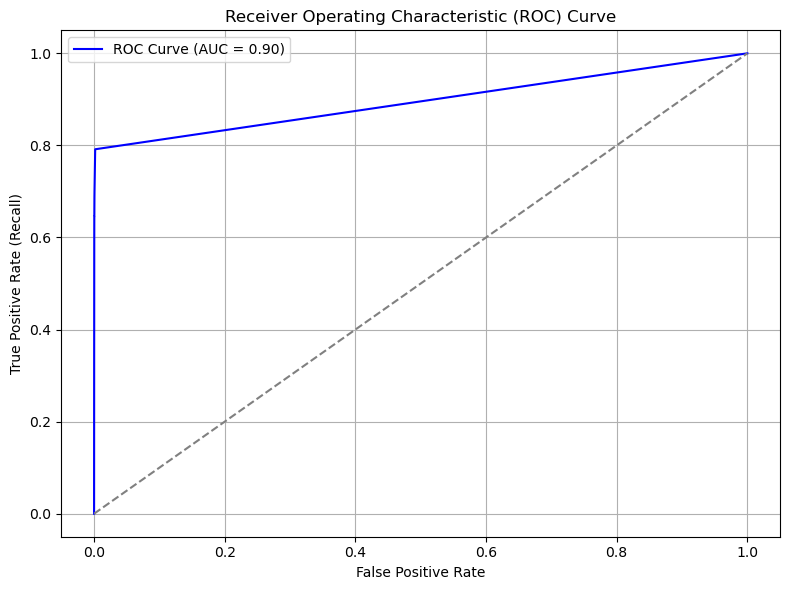

In [43]:
# ROC
draw_roc(y_test, y_probability)

# Decision Tree Result Summary (Imbalanced Data):

* Train set:
    * Accuracy Score = 0.99
    * Sensitivity = 0.75
    * Specificity = 0.99
    * F1-Score = 0.83
    * ROC Score = 0.93

* Test set:
    * Accuracy Score = 0.99
    * Sensitivity = 0.75
    * Specificity = 0.99
    * F1-Score = 0.68
    * ROC Score = 0.89


# Choosing the best model on imbalanced data

As discussed above, both of our models, Logistic Regression and Decision Trees, have performed well on the test set, with ROC-AUC of 0.97 and 0.9, respectively. The Sensitivity score for Logistic and Tree models are 0.56 and 0.75, respectively.

While Logistic Regression model gives the best ROC, Sensitivity is really what we care about because we want to be able to identify fraudulent transactions. Hence, Decision Tree is the best model

# Handling Imbalanced Data

As noted previously, this data is highly imbalanced. We will now try approaches to balance the data:

* Undersampling: To balance the class distribution, the number of non-fraudulent transactions will be reduced to 396 (to be similar to the number of fraudulent transactions, i.e., 492.)
* Oversampling: To balance the class distribution, the number of fraudulent transactions will be increased to match the number of fraudulent transactions, i.e., 227449.


## Undersampling


In [44]:
# Importing the undersampler library

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [45]:
# instantiating the random undersamples

rus = RandomUnderSampler()
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

In [46]:
# Before resampling
print(f'Class Distribution Before Resampling: {Counter(y_train)}')
print(f'Class Distribution After Resampling: {Counter(y_train_rus)}') # notice that the classes are now undersampled

Class Distribution Before Resampling: Counter({0: 227449, 1: 396})
Class Distribution After Resampling: Counter({0: 396, 1: 396})


### Logistic Regression (Undersampled Data)


In [47]:
# Creating a KFold object with 5 splits

folds = KFold(n_splits=5, shuffle=True, random_state=42)

params_LG_US = {'C': [0.01, 0.1, 1, 10, 100, 1000] }

grid_search_LG_US = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid = params_LG_US,
    scoring = 'roc_auc',
    verbose =1,
    cv = folds,
    return_train_score = True
)

# Fitting our dataset on the mode now
grid_search_LG_US.fit(x_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [48]:
# We know that C=0.01 gives the best results
import numpy as np
import pandas as pd

cv_results = grid_search_LG_US.cv_results_
pd = pd.DataFrame(cv_results)
pd

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006738,0.002852,0.002742,0.000305,0.01,{'C': 0.01},0.989048,0.982319,0.975980,0.981466,...,0.984833,0.006700,1,0.989636,0.989214,0.989269,0.992396,0.987809,0.989665,0.001501
1,0.006230,0.001105,0.002587,0.000135,0.10,{'C': 0.1},0.984921,0.981523,0.981046,0.976874,...,0.983943,0.006251,2,0.992192,0.991092,0.990884,0.994330,0.990178,0.991735,0.001449
2,0.005728,0.000549,0.002508,0.000133,1.00,{'C': 1},0.983651,0.980726,0.980556,0.973430,...,0.982615,0.006922,3,0.993350,0.992240,0.991780,0.995894,0.991681,0.992989,0.001569
3,0.006649,0.000541,0.002741,0.000426,10.00,{'C': 10},0.987143,0.976266,0.983333,0.971133,...,0.982325,0.007959,4,0.994009,0.993369,0.992069,0.996303,0.992218,0.993594,0.001535
4,0.006900,0.000594,0.002577,0.000199,100.00,{'C': 100},0.986984,0.973718,0.980719,0.971461,...,0.981358,0.008318,5,0.994209,0.993439,0.992438,0.996333,0.992308,0.993745,0.001468
5,0.008098,0.001286,0.002841,0.000420,1000.00,{'C': 1000},0.986984,0.973718,0.979739,0.971625,...,0.981163,0.008255,6,0.994239,0.993478,0.992537,0.996363,0.992357,0.993795,0.001452


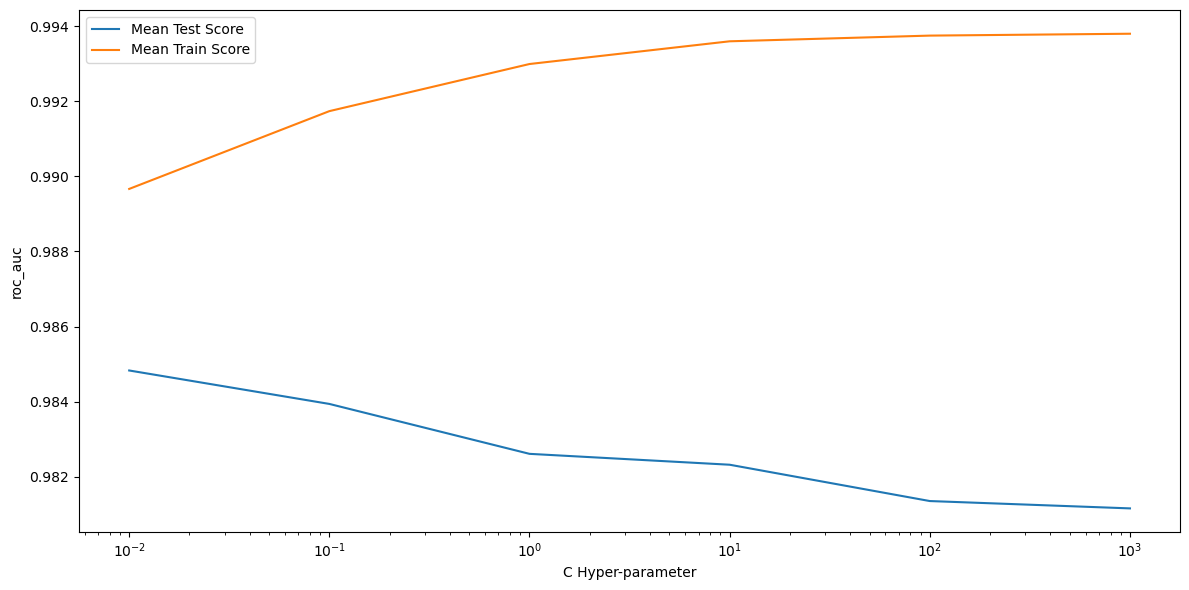

In [49]:
# Plot C, train and validation scores

plt.figure(figsize=(12,6))
plt.plot(pd['param_C'], pd['mean_test_score'], label = "Mean Test Score")
plt.plot(pd['param_C'], pd['mean_train_score'], label = "Mean Train Score")
plt.xlabel('C Hyper-parameter')
plt.ylabel('roc_auc')
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.show()


In [50]:
# Getting the best C score
best_score = grid_search_LG_US.best_score_ # will give roc_auc
best_C = grid_search_LG_US.best_params_['C']

print(f'the highest ROC is {best_score} at C = {best_C}')

the highest ROC is 0.9848332160291295 at C = 0.01


### Logistic Regression with Optimal C:

### Prediction on train set

In [51]:
dt_us_lg_optC = LogisticRegression(C=0.01)
dt_us_lg_optC_model = dt_us_lg_optC.fit(x_train_rus, y_train_rus)
y_predict = dt_us_lg_optC_model.predict(x_train_rus)

In [52]:
# Printing Confusion Matrix, Accuracy Score, Sensitivity, Specificity, F1 Score, Classification report
conf_mat = confusion_matrix(y_train_rus, y_predict)
print(conf_mat)

TP = conf_mat[1,1]
FP = conf_mat[0,1]
TN = conf_mat[0,0]
FN = conf_mat[1,0]

print(f'Confusion Matrix: {conf_mat}')
print(f'Accuracy Score: {accuracy_score(y_train_rus, y_predict)}')
print(f'Sensitivity: {TP / (TP + FN)}')
print(f'Specificity: {TN / (TN + FP)}')
print(f'F1-Score = {f1_score(y_train_rus, y_predict)}')
print(f'\n Classification Report: \n{classification_report(y_train_rus, y_predict)}')

[[396   0]
 [ 42 354]]
Confusion Matrix: [[396   0]
 [ 42 354]]
Accuracy Score: 0.946969696969697
Sensitivity: 0.8939393939393939
Specificity: 1.0
F1-Score = 0.944

 Classification Report: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       396
           1       1.00      0.89      0.94       396

    accuracy                           0.95       792
   macro avg       0.95      0.95      0.95       792
weighted avg       0.95      0.95      0.95       792



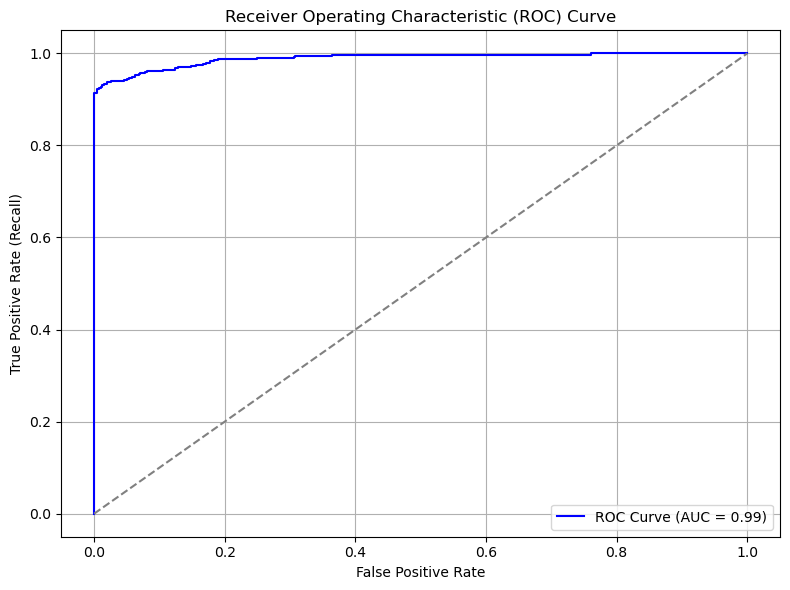

In [53]:
# Generating an ROC
y_probability = dt_us_lg_optC_model.predict_proba(x_train_rus)[:, 1]
draw_roc(y_train_rus, y_probability)

### Prediction on test set


In [54]:
y_test_pred = dt_us_lg_optC_model.predict(x_test)


In [55]:
# Printing Confusion Matrix, Accuracy Score, Sensitivity, Specificity, F1 Score, Classification report

conf_mat = confusion_matrix(y_test, y_test_pred)

TP = conf_mat[1,1]
FP = conf_mat[0,1]
TN = conf_mat[0,0]
FN = conf_mat[1,0]

print(f'Confusion Matrix: {conf_mat}')
print(f'Accuracy Score: {accuracy_score(y_test, y_test_pred)}')
print(f'Sensitivity: {TP / (TP + FN)}')
print(f'Specificity: {TN / (TN + FP)}')
print(f'F1-Score = {f1_score(y_test, y_test_pred)}')
print(f'\n Classification Report: \n{classification_report(y_test, y_test_pred)}')

Confusion Matrix: [[56190   676]
 [   16    80]]
Accuracy Score: 0.9878515501562445
Sensitivity: 0.8333333333333334
Specificity: 0.9881124046002884
F1-Score = 0.18779342723004694

 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.11      0.83      0.19        96

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.59     56962
weighted avg       1.00      0.99      0.99     56962



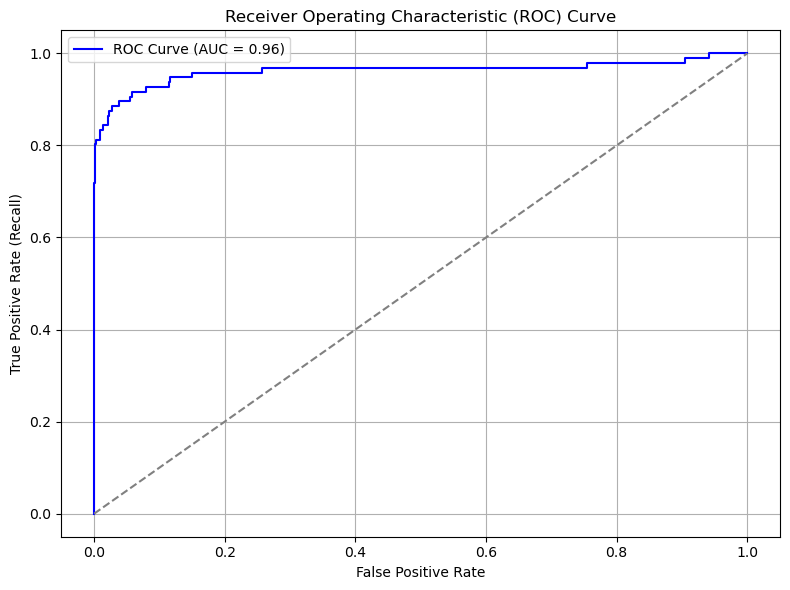

In [56]:
# Predicting the y_test probability 
y_test_prob = dt_us_lg_optC_model.predict_proba(x_test)[:, 1]
draw_roc(y_test, y_test_prob)

## Logistic Regression Results Summary (Undersampled Data)

* Train set
    * Accuracy = 0.94
    * Sensitivity = 0.89
    * Specificity = 1.0
    * ROC = 0.99

* Test set
    * Accuracy = 0.99
    * Sensitivity = 0.84
    * Specificity = 0.99
    * ROC = 0.96

The model generally perform well on the test data, capturing 84% of all the true positives (1). Additionally, TPR-FPR tradeoff is lower with the Logistic Regression model.

## Decision Tree (Undersampled Data)

In [57]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1,5),
    'max_features': [2,5,10, int, 'sqrt', 'log2'],
    'min_samples_leaf': range(1,5)
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train_rus,y_train_rus)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


/opt/miniconda3/envs/ml135_env_sp21/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
48 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/ml135_env_sp21/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/ml135_env_sp21/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/miniconda3/envs/ml135_env_sp21/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_param

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 5),
                         'max_features': [2, 5, 10, <class 'int'>, 'sqrt',
                                          'log2'],
                         'min_samples_leaf': range(1, 5)},
             scoring='roc_auc', verbose=1)

In [58]:
# cv results
import pandas as pd
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004036,0.001066,0.003173,0.000783,1,2,1,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.742424,0.901515,0.666667,0.770202,0.097868,79
1,0.003378,0.000393,0.002629,0.000118,1,2,2,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.886364,0.901515,0.939394,0.909091,0.022302,58
2,0.003017,0.000369,0.002422,0.000022,1,2,3,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.905303,0.712121,0.625000,0.747475,0.117132,80
3,0.002905,0.000208,0.002432,0.000031,1,2,4,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.863636,0.636364,0.844697,0.781566,0.102964,78
4,0.002949,0.000057,0.002581,0.000199,1,5,1,"{'max_depth': 1, 'max_features': 5, 'min_sampl...",0.875000,0.791667,0.901515,0.856061,0.046802,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.003441,0.000086,0.002313,0.000025,4,sqrt,4,"{'max_depth': 4, 'max_features': 'sqrt', 'min_...",0.924989,0.944215,0.965794,0.944999,0.016668,1
92,0.003221,0.000122,0.002290,0.000009,4,log2,1,"{'max_depth': 4, 'max_features': 'log2', 'min_...",0.932449,0.918101,0.941948,0.930833,0.009802,30
93,0.003224,0.000012,0.002340,0.000038,4,log2,2,"{'max_depth': 4, 'max_features': 'log2', 'min_...",0.914715,0.911587,0.970156,0.932153,0.026903,27
94,0.003168,0.000033,0.002332,0.000041,4,log2,3,"{'max_depth': 4, 'max_features': 'log2', 'min_...",0.938045,0.942637,0.922922,0.934535,0.008422,23


In [59]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.944999234771962
DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=4)


In [60]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(x_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

### Prediction on the train set:


In [61]:

# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(x_train_rus)

In [62]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(x_train_rus)
# Confusion matrix
confusion = confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[392   4]
 [ 52 344]]


In [63]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy =", accuracy_score(y_train_rus, y_train_pred))
# Sensitivity
print("Sensitivity =",TP / float(TP+FN))

# Specificity
print("Specificity =", TN / float(TN+FP))

# classification_report
print(classification_report(y_train_rus, y_train_pred))

Accuracy = 0.9292929292929293
Sensitivity = 0.8686868686868687
Specificity = 0.98989898989899
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       396
           1       0.99      0.87      0.92       396

    accuracy                           0.93       792
   macro avg       0.94      0.93      0.93       792
weighted avg       0.94      0.93      0.93       792



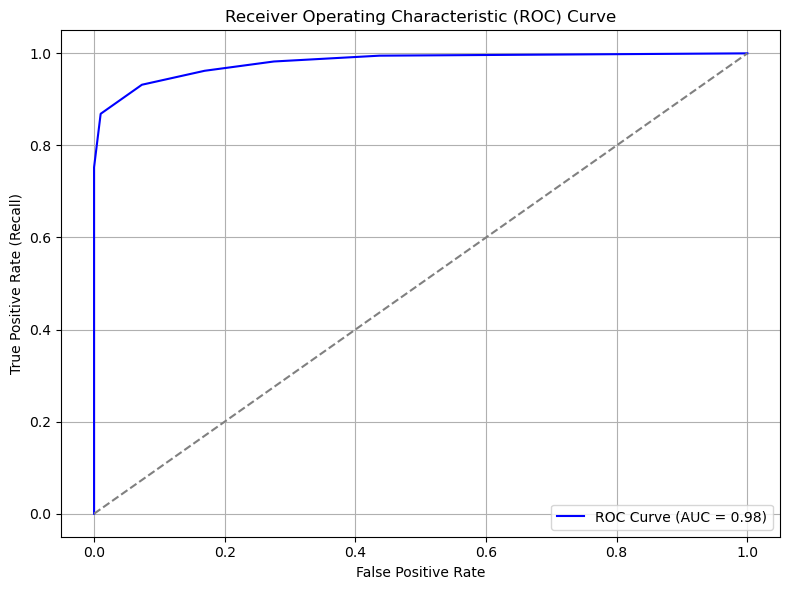

In [64]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(x_train_rus)[:,1]
draw_roc(y_train_rus, y_train_pred_proba)


### Prediction on the test set:



In [65]:
y_test_pred = dt_bal_rus_model.predict(x_test)

# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# Accuracy
print("Accuracy:",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_test, y_test_pred))


[[55718  1148]
 [   19    77]]
Accuracy: 0.9795126575611811
Sensitivity: 0.8020833333333334
Specificity: 0.9798121900608447
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.80      0.12        96

    accuracy                           0.98     56962
   macro avg       0.53      0.89      0.55     56962
weighted avg       1.00      0.98      0.99     56962



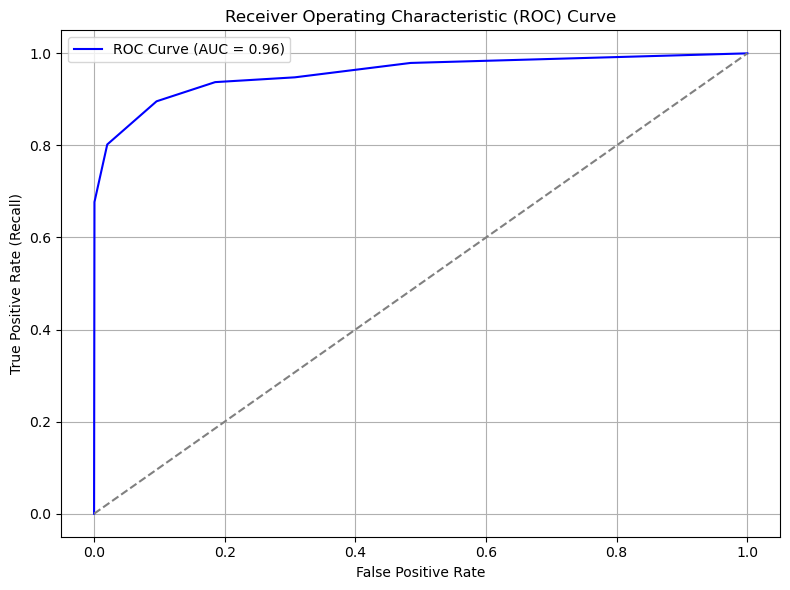

In [66]:
y_test_pred_proba = dt_bal_rus_model.predict_proba(x_test)[:,1]
draw_roc(y_test, y_test_pred_proba)



### Decision Tree Results Summary (Undersampled Data)

* Train set:
    * Accuracy Score = 0.93
    * Sensitivity = 0.87
    * Specificity = 0.99
    * ROC = 0.98


* Test set:
    * Accuracy Score = 0.98
    * Sensitivity = 0.81
    * Specificity = 0.98
    * ROC = 0.96


# Best model for undersampled data

The Logistic Regression model is better when we undersample the data. We get a Sensitivity of 0.84 on test set with the Logistic Regression, compared to 0.81 on Decision Trees.

# Oversampling


In [67]:
# Importing the oversampling library
from imblearn.over_sampling import RandomOverSampler

In [68]:
# Define a variable for over-sampling, you will then fit and resample your data. You only resample train data, not the test

ros = RandomOverSampler()
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

In [69]:
# Before and after resample class distribution
print(f'Before resample Class distribution: {Counter(y_train)}')
print(f'After resample Class distribution: {Counter(y_train_ros)}')

Before resample Class distribution: Counter({0: 227449, 1: 396})
After resample Class distribution: Counter({0: 227449, 1: 227449})


### Logistic Regression  (Oversampled Data)


In [70]:
# Creating a KFold object with 5 splits

folds = KFold(n_splits=5, shuffle=True, random_state=42)

params_LG_OS = {'C': [0.01, 0.1, 1, 10, 100, 1000] }

grid_search_LG_OS = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid = params_LG_OS,
    scoring = 'roc_auc',
    verbose =1,
    cv = folds,
    return_train_score = True
)

# Fitting our dataset on the mode now
grid_search_LG_OS.fit(x_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [71]:
# We know that C=100 gives the best results
import numpy as np
import pandas as pd

cv_results = grid_search_LG_OS.cv_results_
pd = pd.DataFrame(cv_results)
pd

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.600961,0.059596,0.021719,0.003412,0.01,{'C': 0.01},0.988499,0.988771,0.988506,0.988899,...,0.988659,0.000155,6,0.988578,0.988734,0.988790,0.988666,0.988645,0.988683,0.000073
1,0.594333,0.013561,0.019693,0.000326,0.10,{'C': 0.1},0.988518,0.988787,0.988534,0.988913,...,0.988679,0.000151,5,0.988604,0.988759,0.988811,0.988676,0.988665,0.988703,0.000073
2,0.846205,0.351832,0.042857,0.032588,1.00,{'C': 1},0.988511,0.988790,0.988534,0.988914,...,0.988679,0.000154,4,0.988597,0.988761,0.988810,0.988676,0.988666,0.988702,0.000075
3,0.683618,0.065142,0.021356,0.000711,10.00,{'C': 10},0.988509,0.988790,0.988534,0.988915,...,0.988679,0.000154,3,0.988596,0.988762,0.988811,0.988676,0.988667,0.988702,0.000075
4,0.621862,0.013205,0.020599,0.000290,100.00,{'C': 100},0.988509,0.988790,0.988534,0.988915,...,0.988679,0.000154,1,0.988596,0.988762,0.988811,0.988676,0.988667,0.988702,0.000075
5,0.595214,0.009775,0.020989,0.000454,1000.00,{'C': 1000},0.988509,0.988790,0.988534,0.988915,...,0.988679,0.000154,2,0.988596,0.988762,0.988811,0.988676,0.988667,0.988702,0.000075


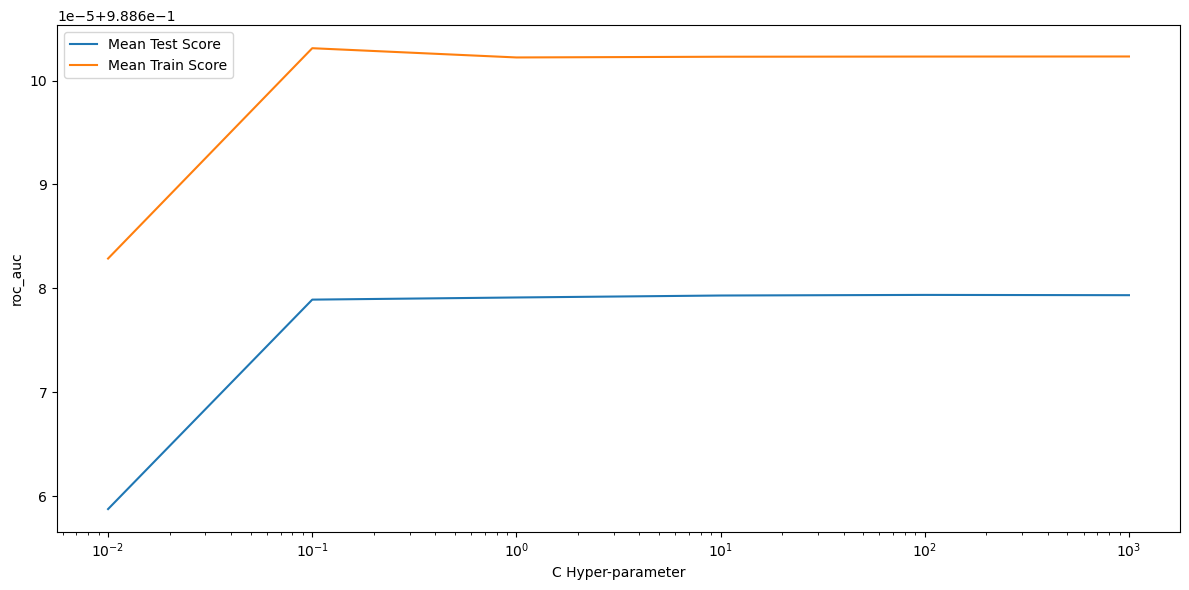

In [72]:
# Plot C, train and validation scores

plt.figure(figsize=(12,6))
plt.plot(pd['param_C'], pd['mean_test_score'], label = "Mean Test Score")
plt.plot(pd['param_C'], pd['mean_train_score'], label = "Mean Train Score")
plt.xlabel('C Hyper-parameter')
plt.ylabel('roc_auc')
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.show()


### Prediction on train set:

In [73]:
# Calculating the best score and best parameters
print(f'Highest ROC-AUC is {grid_search_LG_OS.best_score_} for C = {grid_search_LG_OS.best_params_['C']}')


Highest ROC-AUC is 0.9886793685472572 for C = 100


In [74]:
dt_os_lg_optC = LogisticRegression(C=100)
dt_os_lg_optC_model = dt_os_lg_optC.fit(x_train_ros, y_train_ros)
y_predict = dt_os_lg_optC_model.predict(x_train_ros)

In [75]:
# Printing Confusion Matrix, Accuracy Score, Sensitivity, Specificity, F1 Score, Classification report
conf_mat = confusion_matrix(y_train_ros, y_predict)
print(conf_mat)

TP = conf_mat[1,1]
FP = conf_mat[0,1]
TN = conf_mat[0,0]
FN = conf_mat[1,0]

print(f'Confusion Matrix: {conf_mat}')
print(f'Accuracy Score: {accuracy_score(y_train_ros, y_predict)}')
print(f'Sensitivity: {TP / (TP + FN)}')
print(f'Specificity: {TN / (TN + FP)}')
print(f'F1-Score = {f1_score(y_train_ros, y_predict)}')
print(f'\n Classification Report: \n{classification_report(y_train_ros, y_predict)}')

[[222289   5160]
 [ 17025 210424]]
Confusion Matrix: [[222289   5160]
 [ 17025 210424]]
Accuracy Score: 0.9512308253718416
Sensitivity: 0.9251480551684114
Specificity: 0.9773135955752719
F1-Score = 0.9499247234404661

 Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.93      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



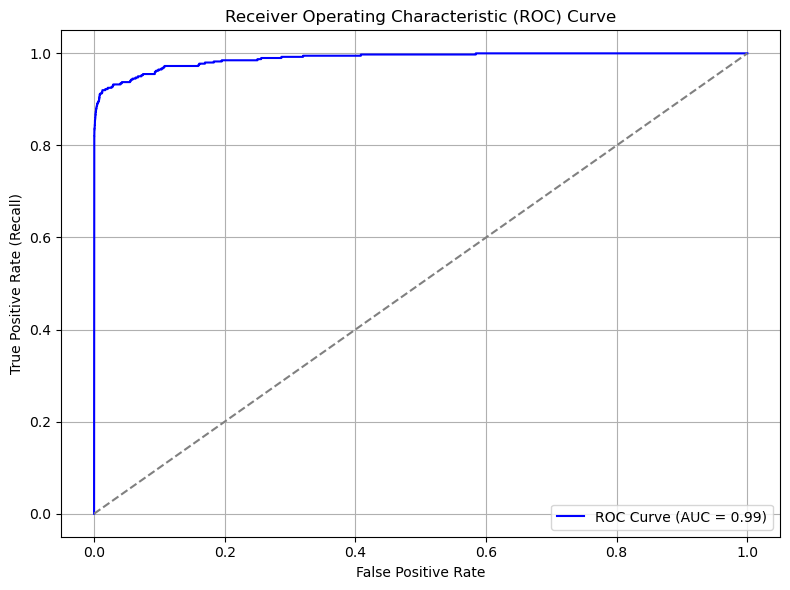

In [76]:
y_train_pred_proba = dt_os_lg_optC_model.predict_proba(x_train_ros)[:,1]
draw_roc(y_train_ros, y_train_pred_proba)



### Prediction on test set


In [77]:
y_test_predict = dt_os_lg_optC_model.predict(x_test)


In [78]:
# Printing the correlation matrix, accuracy score, classification report, sensitivity, specificity

conf_mat = confusion_matrix(y_test, y_test_predict)

TP = conf_mat[1,1]
FP = conf_mat[0,1]
TN = conf_mat[0,0]
FN = conf_mat[1,0]

print(f'Confusion Matrix: {conf_mat}')
print(f'Accuracy Score: {accuracy_score(y_test, y_test_predict)}')
print(f'Sensitivity: {TP / (TP + FN)}')
print(f'Specificity: {TN / (TN + FP)}')
print(f'F1 Score = {f1_score(y_test, y_test_predict)}')
print(f'\nClassification Report: \n{classification_report(y_test, y_test_predict)}')

Confusion Matrix: [[55552  1314]
 [   11    85]]
Accuracy Score: 0.9767388785506127
Sensitivity: 0.8854166666666666
Specificity: 0.9768930468118032
F1 Score = 0.11371237458193979

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



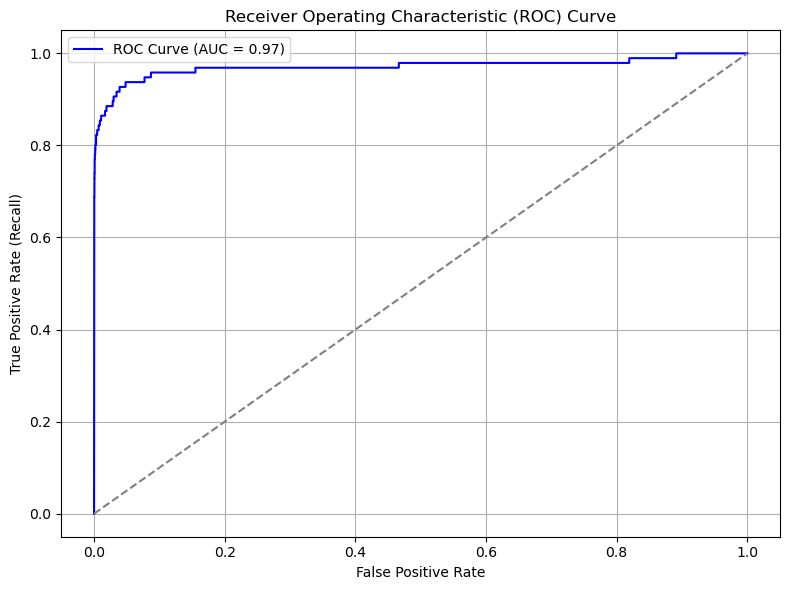

In [79]:
# Calculaing the probability
y_test_prob = dt_os_lg_optC_model.predict_proba(x_test)[:,1]
draw_roc(y_test, y_test_prob)

### Logistic Regression Results Summary (Oversampled Data)

* Train set:
   * Accuracy Score = 0.95
    * Sensitivity = 0.92
    * Specificity = 0.98
    * ROC-AUC = 0.99
   
* Test Set:
    * Accuracy Score = 0.97
    * Sensitivity = 0.9
    * Specificity = 0.97
    * ROC-AUC = 0.97

The Logistic Regression model perform well on the oversampled test data, correctly identifying 90% of the fraudulent transactions present. The AUC = 0.97, implying that most actual positives are identified as positives, too.

### Decision Tree (Oversampled Data)


In [80]:
param_grid = {
    'max_depth': range(1,5),
    'max_features': [2,5,10, int, 'sqrt', 'log2'],
    'min_samples_leaf': range(1,5),
}

dtree = DecisionTreeClassifier()

grid_search_detree = GridSearchCV(
    estimator = dtree,
    cv = 3, 
    verbose = 1,
    param_grid = param_grid, 
)

# Fit grid on the Oversampled data
grid_search_detree.fit(x_train_ros, y_train_ros)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


/opt/miniconda3/envs/ml135_env_sp21/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
48 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/ml135_env_sp21/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/ml135_env_sp21/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/miniconda3/envs/ml135_env_sp21/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_param

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 5),
                         'max_features': [2, 5, 10, <class 'int'>, 'sqrt',
                                          'log2'],
                         'min_samples_leaf': range(1, 5)},
             verbose=1)

In [81]:
# cv results
import pandas as pd
cv_result = grid_search_detree.cv_results_
pd = pd.DataFrame(cv_result)
pd

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.160636,0.026301,0.015445,0.003078,1,2,1,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.791642,0.907560,0.763876,0.821026,0.062230,78
1,0.141863,0.003203,0.013557,0.000857,1,2,2,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.885071,0.852031,0.907130,0.881411,0.022643,67
2,0.158208,0.015413,0.013699,0.001009,1,2,3,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.518706,0.819769,0.750501,0.696325,0.128740,80
3,0.149129,0.012132,0.015111,0.001729,1,2,4,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.676172,0.751169,0.734344,0.720562,0.032131,79
4,0.222891,0.006411,0.012924,0.000368,1,5,1,"{'max_depth': 1, 'max_features': 5, 'min_sampl...",0.885467,0.907560,0.750501,0.847843,0.069419,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.604579,0.018093,0.014984,0.001580,4,sqrt,4,"{'max_depth': 4, 'max_features': 'sqrt', 'min_...",0.931855,0.944188,0.899184,0.925075,0.018988,34
92,0.564979,0.046762,0.016034,0.001435,4,log2,1,"{'max_depth': 4, 'max_features': 'log2', 'min_...",0.923862,0.948171,0.933932,0.935322,0.009973,14
93,0.534907,0.029220,0.014394,0.000582,4,log2,2,"{'max_depth': 4, 'max_features': 'log2', 'min_...",0.941675,0.922134,0.941925,0.935245,0.009271,15
94,0.505292,0.008686,0.014098,0.000066,4,log2,3,"{'max_depth': 4, 'max_features': 'log2', 'min_...",0.934823,0.947874,0.937025,0.939907,0.005705,7


In [82]:
# Printing the ROC-AUC Score and the best estimators
print(f'Best roc_auc = {grid_search_detree.best_score_}')
print(f'Best parameters= {grid_search_detree.best_estimator_}')

Best roc_auc = 0.9524816569577849
Best parameters= DecisionTreeClassifier(max_depth=4, max_features=10)


#### Prediction on train data

In [83]:
# Generating the predictions on the train data now

dtree_model = DecisionTreeClassifier(max_depth=4, max_features=10, min_samples_leaf=2)
dtree_model.fit(x_train_ros, y_train_ros)
y_predict = dtree_model.predict(x_train_ros)

In [84]:
# Printing the correlation matrix, accuracy score, classification report, sensitivity, specificity

conf_mat = confusion_matrix(y_train_ros, y_predict)

TP = conf_mat[1,1]
FP = conf_mat[0,1]
TN = conf_mat[0,0]
FN = conf_mat[1,0]

print(f'Confusion Matrix: {conf_mat}')
print(f'Accuracy Score: {accuracy_score(y_train_ros, y_predict)}')
print(f'Sensitivity: {TP / (TP + FN)}')
print(f'Specificity: {TN / (TN + FP)}')
print(f'F1 Score = {f1_score(y_train_ros, y_predict)}')
print(f'\nClassification Report: \n{classification_report(y_train_ros, y_predict)}')

Confusion Matrix: [[218671   8778]
 [ 14918 212531]]
Accuracy Score: 0.947909201623221
Sensitivity: 0.9344116703085087
Specificity: 0.9614067329379333
F1 Score = 0.947196484519496

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95    227449
           1       0.96      0.93      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



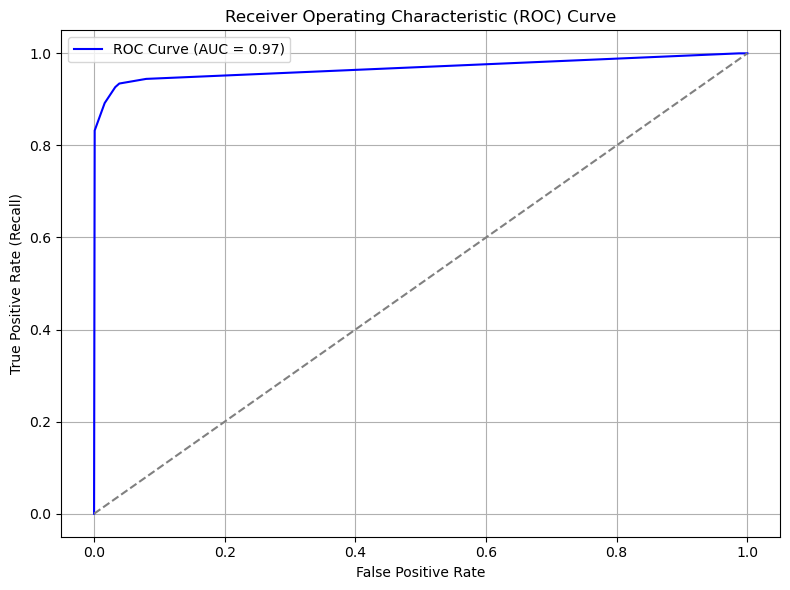

In [85]:
# Creating the ROC-AUC Curve:
y_probability = dtree_model.predict_proba(x_train_ros)[:, 1]
draw_roc(y_train_ros, y_probability)


#### Prediction on test data

In [86]:
y_test_prob = dtree_model.predict(x_test)

In [87]:
# Printing the correlation matrix, accuracy score, classification report, sensitivity, specificity

conf_mat = confusion_matrix(y_test, y_test_prob)

TP = conf_mat[1,1]
FP = conf_mat[0,1]
TN = conf_mat[0,0]
FN = conf_mat[1,0]

print(f'Confusion Matrix: {conf_mat}')
print(f'Accuracy Score: {accuracy_score(y_test, y_test_prob)}')
print(f'Sensitivity: {TP / (TP + FN)}')
print(f'Specificity: {TN / (TN + FP)}')
print(f'F1 Score = {f1_score(y_test, y_test_prob)}')
print(f'\nClassification Report: \n{classification_report(y_test, y_test_prob)}')

Confusion Matrix: [[54645  2221]
 [   13    83]]
Accuracy Score: 0.960780871458165
Sensitivity: 0.8645833333333334
Specificity: 0.960943270143847
F1 Score = 0.06916666666666667

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56866
           1       0.04      0.86      0.07        96

    accuracy                           0.96     56962
   macro avg       0.52      0.91      0.52     56962
weighted avg       1.00      0.96      0.98     56962



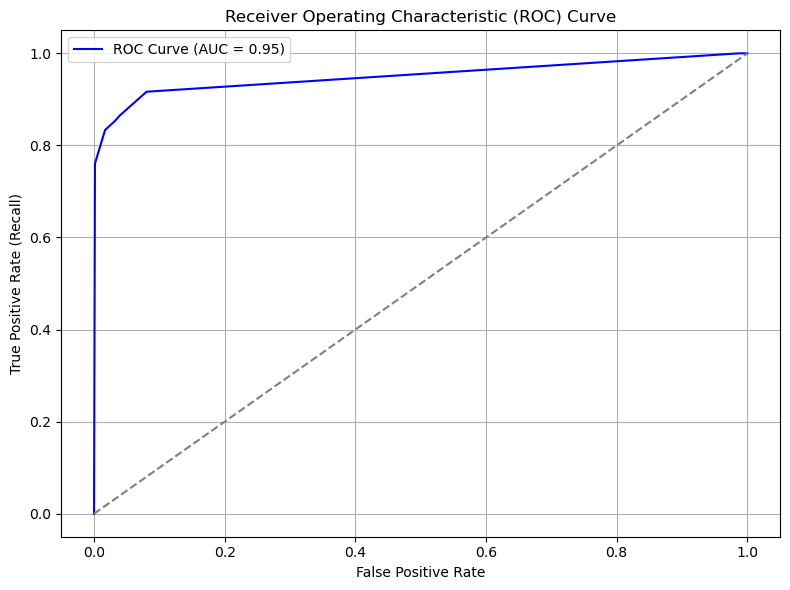

In [88]:
# Calculating the y_probability
y_test_prob = dtree_model.predict_proba(x_test)[:, 1]
draw_roc(y_test, y_test_prob)

### Decision Tree Results Summary (Oversampled Data)

* Train set

    * Accuracy Score= 0.95
    * Sensitivity = 0.93
    * Specificity = 0.97
    * ROC-AUC = 0.97

* Test set:
    * Accuracy Score = 0.96
    * Sensitivity = 0.86
    * Specificity = 0.96
    * ROC-AUC = 0.95


### Best model for oversampled data

The best model for oversampled data is again Logistic Regression, with a Sensitivity and AUC of 0.9, 0.97, respectively. This compares to a Sensitivity, ROC-AUC, and Precision of 0.86 and 0.95 in the Decision Tree model